In [ ]:
import numpy as np
import json
from sklearn.model_selection import train_test_split, cross_validate,StratifiedKFold
from pickle import load
from numpy import array
import pandas as pd
import numpy as np
import ast
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.manifold import TSNE

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving gen_sample_model1.csv to gen_sample_model1.csv


In [ ]:
df_ctgan = pd.read_csv("gen_sample_model1.csv")

In [ ]:
print(df_ctgan.shape)

(20000, 166)


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.chdir('/content/gdrive/My Drive/Bitcoin')  

In [48]:
df_features = pd.read_csv("elliptic_txs_features.csv")
df_edgelist = pd.read_csv("elliptic_txs_edgelist.csv")
df_classes =  pd.read_csv("elliptic_txs_classes.csv")

In [49]:
df_features=pd.DataFrame(df_features.values, columns = ["Feature {}".format(i) for i in range(df_features.shape[1])])
df_features

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12,Feature 13,Feature 14,Feature 15,Feature 16,Feature 17,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30,Feature 31,Feature 32,Feature 33,Feature 34,Feature 35,Feature 36,Feature 37,Feature 38,Feature 39,...,Feature 127,Feature 128,Feature 129,Feature 130,Feature 131,Feature 132,Feature 133,Feature 134,Feature 135,Feature 136,Feature 137,Feature 138,Feature 139,Feature 140,Feature 141,Feature 142,Feature 143,Feature 144,Feature 145,Feature 146,Feature 147,Feature 148,Feature 149,Feature 150,Feature 151,Feature 152,Feature 153,Feature 154,Feature 155,Feature 156,Feature 157,Feature 158,Feature 159,Feature 160,Feature 161,Feature 162,Feature 163,Feature 164,Feature 165,Feature 166
0,5530458.0,1.0,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,-0.167948,-0.049707,-0.164417,-0.028741,-0.035391,-0.042955,-0.013282,-0.055327,-0.169757,-0.171477,-0.174490,0.887058,0.884557,-0.139731,-0.148912,-0.080147,-0.155661,-0.010763,-0.012107,-0.139733,-0.148907,-0.080147,-0.155661,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,...,-0.097719,-0.127462,0.003143,0.002426,-0.121330,-0.110933,-0.075909,-0.111641,-1.159649,-1.160129,-1.373723,-1.353918,-0.295982,-1.403215,-0.975738,-0.975237,-0.168742,-0.263290,-0.186389,-0.250875,-1.015963,-1.016230,-0.968903,0.146997,1.366287,-0.464773,-1.116918,-1.116948,-0.216814,0.634272,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,232022460.0,1.0,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,-0.168576,-0.049707,-0.165054,-0.028741,-0.035391,-0.042955,-0.013282,-0.055298,-0.170400,-0.172217,-0.175227,0.887058,0.884557,-0.139729,-0.148911,-0.080147,-0.155660,-0.010763,-0.012107,-0.139731,-0.148906,-0.080147,-0.155660,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,...,-0.097719,-0.129496,0.003143,0.002426,-0.122974,-0.041556,0.012549,-0.032244,-1.159649,-1.160129,-1.373902,-1.356210,-0.301548,-1.404577,-0.975738,-0.975237,-0.168742,-0.192468,-0.099790,-0.182133,-1.015963,-1.016230,-0.968903,-1.421138,-0.453330,-1.375441,-1.116918,-1.116948,-0.216814,0.407161,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
2,232438397.0,1.0,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,-0.115831,0.043598,-0.163905,1.059993,2.397457,-0.063200,-0.013282,4.800240,0.174329,-0.172908,0.619399,-0.243300,-0.243452,-0.139732,-0.146895,-0.079667,-0.155554,0.773847,0.378516,-0.139734,-0.146891,-0.079667,-0.155553,0.773932,0.378593,-0.024669,-0.031271,-0.023044,-0.026215,0.101008,...,0.019771,-0.119195,0.147881,0.956170,0.759756,-0.041556,-0.188716,0.149949,-0.047722,-0.048171,-1.373723,-1.356131,-0.301754,-1.404445,0.183133,0.182748,-0.163577,-0.456561,-0.424672,-0.436915,0.143001,0.142525,-0.425896,-1.421138,-1.059868,-1.071885,0.185597,0.185492,-0.216814,-0.617907,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
3,230460314.0,1.0,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,0.041399,0.935886,-0.098695,1.203038,0.988902,0.341693,-0.013282,-0.057392,0.058329,-0.032930,-0.042709,0.065455,0.324947,-0.139732,-0.148854,-0.080105,-0.155638,1.313051,1.106965,-0.139734,-0.148850,-0.080104,-0.155638,1.313130,1.106995,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,...,-0.077909,-0.093120,1.587690,1.586539,-0.101820,0.704558,0.448898,0.659662,0.311091,0.302198,-1.373962,-1.355393,-0.300941,-1.404583,0.064846,-0.035232,-0.168742,-0.442156,-0.416540,-0.418273,0.367605,0.392035,-0.968903,-1.943850,-1.059868,-1.678997,0.185597,0.185492,-0.169472,-0.470592,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.

In [50]:
df_features["label"]=df_classes[["class"]]
df_labelled=df_features.loc[df_features['label'].isin(["1","2"])]
df_labelled["label"].replace({"1": 1, "2": 2}, inplace=True)
df = df_labelled
df

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12,Feature 13,Feature 14,Feature 15,Feature 16,Feature 17,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30,Feature 31,Feature 32,Feature 33,Feature 34,Feature 35,Feature 36,Feature 37,Feature 38,Feature 39,...,Feature 128,Feature 129,Feature 130,Feature 131,Feature 132,Feature 133,Feature 134,Feature 135,Feature 136,Feature 137,Feature 138,Feature 139,Feature 140,Feature 141,Feature 142,Feature 143,Feature 144,Feature 145,Feature 146,Feature 147,Feature 148,Feature 149,Feature 150,Feature 151,Feature 152,Feature 153,Feature 154,Feature 155,Feature 156,Feature 157,Feature 158,Feature 159,Feature 160,Feature 161,Feature 162,Feature 163,Feature 164,Feature 165,Feature 166,label
3,230460314.0,1.0,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,0.041399,0.935886,-0.098695,1.203038,0.988902,0.341693,-0.013282,-0.057392,0.058329,-0.032930,-0.042709,0.065455,0.324947,-0.139732,-0.148854,-0.080105,-0.155638,1.313051,1.106965,-0.139734,-0.148850,-0.080104,-0.155638,1.313130,1.106995,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,...,-0.093120,1.587690,1.586539,-0.101820,0.704558,0.448898,0.659662,0.311091,0.302198,-1.373962,-1.355393,-0.300941,-1.404583,0.064846,-0.035232,-0.168742,-0.442156,-0.416540,-0.418273,0.367605,0.392035,-0.968903,-1.943850,-1.059868,-1.678997,0.185597,0.185492,-0.169472,-0.470592,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117,2
9,232344069.0,1.0,-0.147852,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.137933,-0.144108,-0.049707,-0.140266,-0.028741,-0.035391,-0.042955,-0.013282,-0.006754,-0.148916,-0.151494,-0.146513,0.887058,0.884557,-0.139721,-0.148905,-0.080147,-0.155653,-0.010763,-0.012107,-0.139723,-0.148901,-0.080147,-0.155653,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,...,-0.127462,0.003143,0.002426,-0.115680,-0.190199,-0.177836,-0.201578,1.064205,1.063787,-1.373932,-1.356183,-0.301411,-1.404577,-0.975738,-0.975237,-0.168742,-0.445357,-0.409015,-0.427594,-1.015963,-1.016230,-0.968903,-1.943850,-1.059868,-1.678997,0.185597,0.185492,-0.216814,-0.617907,-0.577099,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,2
10,27553029.0,1.0,-0.151357,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.141519,-0.147643,-0.049707,-0.143847,-0.028741,-0.035391,-0.042955,-0.013282,-0.038424,-0.150266,-0.150457,-0.150661,0.887058,0.884557,-0.139722,-0.148906,-0.080147,-0.155654,-0.010763,-0.012107,-0.139724,-0.148902,-0.080147,-0.155654,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,...,-0.127462,0.003143,0.002426,-0.107516,-0.190820,-0.180486,-0.200607,1.064205,1.063787,-1.373902,-1.348835,-0.282308,-1.400475,-0.975738,-0.975237,-0.168742,-0.454961,-0.420758,-0.436915,-1.015963,-1.016230,-0.968903,-1.943850,-1.059868,-1.678997,0.185597,0.185492,-0.216814,-0.587217,-0.539735,-0.582077,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,2
11,36411953.0,1.0,-0.172621,-0.162277,0.463609,-0.046932,-0.043875,-0.029140,-0.061584,-0.163512,-0.169227,-0.048778,-0.165764,2.459222,2.415325,-0.042955,-0.013282,-0.056091,-0.170872,-0.172695,-0.175836,0.887058,0.884557,-0.139732,-0.148912,-0.080147,-0.155662,2.679386,2.665377,-0.139734,-0.148908,-0.080147,-0.155662,2.679448,2.665308,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,...,-0.124412,-3.872194,-3.871849,-0.124473,-0.182729,-0.166347,-0.194807,1.064205,1.063787,-1.373872,-1.349151,-0.283202,-1.400636,1.342003,1.340733,-0.159807,-0.451549,-0.419971,-0.430916,1.301966,1.301281,0.660117,0.146997,-0.453330,0.445895,1.488113,1.487932,-0.193143,-0.544250,-0.494897,-0.531617,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,

In [ ]:
df_ctgan = df_ctgan.iloc[:,1:]
df_ctgan

,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12,Feature 13,Feature 14,Feature 15,Feature 16,Feature 17,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30,Feature 31,Feature 32,Feature 33,Feature 34,Feature 35,Feature 36,Feature 37,Feature 38,Feature 39,Feature 40,Feature 41,...,Feature 127,Feature 128,Feature 129,Feature 130,Feature 131,Feature 132,Feature 133,Feature 134,Feature 135,Feature 136,Feature 137,Feature 138,Feature 139,Feature 140,Feature 141,Feature 142,Feature 143,Feature 144,Feature 145,Feature 146,Feature 147,Feature 148,Feature 149,Feature 150,Feature 151,Feature 152,Feature 153,Feature 154,Feature 155,Feature 156,Feature 157,Feature 158,Feature 159,Feature 160,Feature 161,Feature 162,Feature 163,Feature 164,Feature 165,Feature 166
0,0.812433,0.233822,0.938797,-0.158913,-0.044201,0.004209,-0.065176,-0.201173,-0.114921,0.918663,0.457192,0.001957,-0.021991,0.314829,-0.013846,-0.029148,0.638936,-0.185365,-0.227762,-0.302940,0.852477,-0.127958,-0.157906,4.396854,-0.138764,-1.870528,-2.129480,0.429178,-0.146723,-0.143607,-0.161774,-0.015594,2.967509,-0.027434,-0.030539,0.000673,-0.021749,0.018559,-0.121043,-0.244808,...,0.172254,-0.128535,0.046400,4.774252,0.795182,-0.204817,-0.232257,-0.227974,1.111389,1.035389,-0.490844,1.376069,-0.190435,-0.623200,1.308153,0.334131,-0.184332,0.204267,-0.371791,-0.392480,0.218329,0.207510,0.668225,0.645503,-1.011062,0.761520,0.191804,0.197212,1.033050,-0.845082,-0.607364,0.262055,0.240657,0.274079,-0.069278,-0.137429,-0.151098,-0.115841,-0.123955,-0.125682
1,0.115625,-0.177510,0.478585,0.376575,-0.033144,0.019237,-0.079820,-0.175263,0.136555,0.159473,0.375560,-2.058627,0.058720,0.154917,-0.015753,-0.020196,-0.176230,-0.203188,0.971564,-1.058707,0.895937,0.637429,-0.158861,3.704072,4.586995,-2.087262,-0.005480,-0.144086,-0.130428,0.562825,0.227898,1.273738,-0.030081,-0.028846,-0.025599,-0.003535,-0.034082,8.243325,-0.018116,1.836917,...,-0.113659,0.029460,-0.444204,1.327848,0.219055,-0.148168,0.695386,0.242118,1.154750,0.094325,0.491496,-0.677022,4.470660,0.951029,-0.664776,-0.968140,-0.226123,-0.338570,2.330309,-0.402782,-0.911803,-0.971882,-0.938018,-2.146697,1.494242,2.282509,1.595992,0.907089,6.466293,1.839353,1.318884,0.833206,0.239601,0.435582,-0.030799,-0.009725,0.187187,-0.196258,1.629293,1.592436
2,0.631144,-0.179367,-0.411252,-0.136466,0.119757,1.810484,-0.019089,-0.145054,0.216745,1.302051,2.491149,2.036325,1.367171,-0.068288,-0.011551,1.965727,-0.179456,-0.207162,-0.201468,-1.509524,-0.941753,-0.148589,-0.166518,-0.085824,-0.172216,-0.023754,-0.016600,-0.209126,3.052019,-0.053770,-0.178834,-0.017172,1.210748,-0.019601,-0.062018,-0.033426,-0.026960,-0.005098,-4.277249,8.286377,...,1.459594,-0.062101,3.717740,-0.117123,-0.081691,-0.112305,-0.343734,0.230819,1.097830,0.281242,-0.063378,1.229611,2.590834,-0.137020,0.134048,-0.169384,-0.076664,5.179762,-0.348370,0.713041,1.179660,0.058492,2.103576,1.208052,2.022157,2.020082,1.550643,-1.088177,2.647076,-0.336449,-0.353094,-0.439690,-0.952323,-0.098133,-0.179803,-0.106130,-0.144190,-0.102660,-0.139663,1.496270
3,4.612458,-0.108030,2.545796,-0.107943,-0.010347,3.548427,-0.040765,3.028136,-0.182049,0.038760,1.616634,-1.313318,-0.047853,0.431188,-0.013336,0.026776,0.249380,0.676672,1.335203,0.236649,-1.329238,-0.160332,-0.151693,-0.078201,2.348944,0.820081,0.352980,-0.178754,-0.074079,-0.111477,0.011688,2.206045,-0.029202,-0.010692,-0.070046,-0.017329,-0.033342,-0.003010,-0.004280,2.635825,...,-0.099294,-0.114231,0.394375,0.014349,0.336731,0.081386,0.175853,5.552200,-0.304560,-0.346954,-0.199620,0.638120,3.720023,-0.725811,0.238335,0.202485,-0.171081,-0.480651,2.797339,2.401036,-0.322216,-0.084503,1.681488,-0.804970,-1.064608,-0.220121,0.145028,1.262790,-0.017185,-0.494089,0.628640,-0.507038,-0.940743,0.179343,0.003509,-0.126340,0.318981,0.498870,-1.560073,-0.093976
4,-0.15

In [ ]:
df_org1 = df[df["label"]==1]
df_org1 = df_org1.iloc[:,:-1]
df_org1

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12,Feature 13,Feature 14,Feature 15,Feature 16,Feature 17,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30,Feature 31,Feature 32,Feature 33,Feature 34,Feature 35,Feature 36,Feature 37,Feature 38,Feature 39,...,Feature 127,Feature 128,Feature 129,Feature 130,Feature 131,Feature 132,Feature 133,Feature 134,Feature 135,Feature 136,Feature 137,Feature 138,Feature 139,Feature 140,Feature 141,Feature 142,Feature 143,Feature 144,Feature 145,Feature 146,Feature 147,Feature 148,Feature 149,Feature 150,Feature 151,Feature 152,Feature 153,Feature 154,Feature 155,Feature 156,Feature 157,Feature 158,Feature 159,Feature 160,Feature 161,Feature 162,Feature 163,Feature 164,Feature 165,Feature 166
907,231573972.0,1.0,-0.112367,0.391015,0.463609,1.829006,-0.043875,1.731967,0.547008,-0.163581,-0.144008,0.014275,-0.163655,0.315018,-0.384210,-0.042955,-0.013282,-0.056489,-0.108896,-0.101434,-0.104502,0.887058,0.884557,-0.139732,-0.148905,-0.080144,-0.155661,0.651312,0.790402,-0.139734,-0.148900,-0.080144,-0.155661,0.651398,0.790453,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,...,-0.094217,-0.127236,-0.083312,0.704113,0.026712,-0.170246,-0.184969,-0.149256,1.064205,1.063787,-1.373782,-1.354445,-0.297219,-1.403537,-0.975738,-0.975237,-0.168742,-0.417588,-0.375059,-0.400640,-1.015963,-1.016230,-0.968903,0.146997,1.366287,-0.464773,-1.116918,-1.116948,-0.193143,-0.513559,-0.457532,-0.500080,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1361,231178835.0,1.0,-0.172300,-0.184668,-1.201369,-0.046932,-0.024025,-0.029140,-0.061584,-0.163643,-0.168774,-0.043462,-0.165601,-2.516705,-2.486106,-0.022711,-0.013282,-0.057373,-0.170453,-0.172256,-0.175726,-1.222231,-1.371460,-0.139732,-0.148912,-0.080147,-0.155662,-2.700912,-2.689592,-0.139734,-0.148907,-0.080146,-0.155662,-2.700785,-2.689318,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,...,-0.095439,-0.126446,3.878480,3.876702,-0.124877,-0.200078,-0.188373,-0.214717,0.017182,0.507808,-1.373782,-1.354866,-0.299003,-1.403996,1.206586,1.340733,-0.168742,-0.457150,-0.423661,-0.439367,0.143001,0.142525,-0.968903,0.146997,0.921079,-0.869515,0.185597,0.185492,-0.193143,-0.611769,-0.577099,-0.600999,0.241128,0.241406,0.018279,-0.068266,-0.093204,-0.068808,1.299939,1.301521
2718,230333889.0,1.0,-0.172493,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.163144,-0.168965,-0.049707,-0.165448,-0.028741,-0.035391,-0.042955,-0.013282,-0.057283,-0.170655,-0.172349,-0.175684,0.887058,0.884557,-0.139732,-0.148912,-0.080147,-0.155662,-0.010763,-0.012107,-0.139733,-0.148907,-0.080147,-0.155662,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,...,-0.097719,-0.127462,0.003143,0.002426,-0.123629,-0.191715,-0.177949,-0.204961,-1.159649,-1.160129,-1.373962,-1.313566,-0.190163,-1.380885,-0.975738,-0.975237,-0.168742,-0.306917,-0.239734,-0.293220,-1.015963,-1.016230,-0.968903,0.669709,1.972826,-0.161217,-1.116918,-1.116948,-0.216814,-0.102304,0.050628,-0.083789,-0.979074,-0.978556,-0.098889,-0.087490,-0.084674,-0.140597,1.519700,1.521399
2815,232947876.0,1.0,-0.158104,-0.166548,-0.646376,-0.046932,-0.063725,-0.029140,-0.061584,-0.158748,-0.159279,-0.000826,-0.158346,2.459222,2.415325,-0.063200,-0.013282,0.157678,-0.155854,-0.172908,-0.141035,-0.243300,-0.243452,-0.139170,-0.147836,-0.079120,-0.154709,-2.700912,-2.689592,-0.139172,-0.147831,-0.079119,-0.154709,-2.700785,-2.689318,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,...,-0.095439,-0.128479,3.878480,3.876702,0.032690,-0.172124,-0.188716,-0.150180,-0.047722,-0.048171,-1.373483,-1.355920,-0.301754,-1.404211,0.183133,0.182748,-0.068298,-0.427031,-0.424672,-0.379589,0.143001,0.142525,1.203124,0.146997,-1.059868,0.749451,0.185597,0.185492,-0.003773,-0.562664,-0.577099,-0.500080,0.241128,0.

In [ ]:
df_org1 = df_org1.iloc[:,2:]
df_org1

,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12,Feature 13,Feature 14,Feature 15,Feature 16,Feature 17,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30,Feature 31,Feature 32,Feature 33,Feature 34,Feature 35,Feature 36,Feature 37,Feature 38,Feature 39,Feature 40,Feature 41,...,Feature 127,Feature 128,Feature 129,Feature 130,Feature 131,Feature 132,Feature 133,Feature 134,Feature 135,Feature 136,Feature 137,Feature 138,Feature 139,Feature 140,Feature 141,Feature 142,Feature 143,Feature 144,Feature 145,Feature 146,Feature 147,Feature 148,Feature 149,Feature 150,Feature 151,Feature 152,Feature 153,Feature 154,Feature 155,Feature 156,Feature 157,Feature 158,Feature 159,Feature 160,Feature 161,Feature 162,Feature 163,Feature 164,Feature 165,Feature 166
907,-0.112367,0.391015,0.463609,1.829006,-0.043875,1.731967,0.547008,-0.163581,-0.144008,0.014275,-0.163655,0.315018,-0.384210,-0.042955,-0.013282,-0.056489,-0.108896,-0.101434,-0.104502,0.887058,0.884557,-0.139732,-0.148905,-0.080144,-0.155661,0.651312,0.790402,-0.139734,-0.148900,-0.080144,-0.155661,0.651398,0.790453,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227215,...,-0.094217,-0.127236,-0.083312,0.704113,0.026712,-0.170246,-0.184969,-0.149256,1.064205,1.063787,-1.373782,-1.354445,-0.297219,-1.403537,-0.975738,-0.975237,-0.168742,-0.417588,-0.375059,-0.400640,-1.015963,-1.016230,-0.968903,0.146997,1.366287,-0.464773,-1.116918,-1.116948,-0.193143,-0.513559,-0.457532,-0.500080,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1361,-0.172300,-0.184668,-1.201369,-0.046932,-0.024025,-0.029140,-0.061584,-0.163643,-0.168774,-0.043462,-0.165601,-2.516705,-2.486106,-0.022711,-0.013282,-0.057373,-0.170453,-0.172256,-0.175726,-1.222231,-1.371460,-0.139732,-0.148912,-0.080147,-0.155662,-2.700912,-2.689592,-0.139734,-0.148907,-0.080146,-0.155662,-2.700785,-2.689318,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227215,...,-0.095439,-0.126446,3.878480,3.876702,-0.124877,-0.200078,-0.188373,-0.214717,0.017182,0.507808,-1.373782,-1.354866,-0.299003,-1.403996,1.206586,1.340733,-0.168742,-0.457150,-0.423661,-0.439367,0.143001,0.142525,-0.968903,0.146997,0.921079,-0.869515,0.185597,0.185492,-0.193143,-0.611769,-0.577099,-0.600999,0.241128,0.241406,0.018279,-0.068266,-0.093204,-0.068808,1.299939,1.301521
2718,-0.172493,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.163144,-0.168965,-0.049707,-0.165448,-0.028741,-0.035391,-0.042955,-0.013282,-0.057283,-0.170655,-0.172349,-0.175684,0.887058,0.884557,-0.139732,-0.148912,-0.080147,-0.155662,-0.010763,-0.012107,-0.139733,-0.148907,-0.080147,-0.155662,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227092,...,-0.097719,-0.127462,0.003143,0.002426,-0.123629,-0.191715,-0.177949,-0.204961,-1.159649,-1.160129,-1.373962,-1.313566,-0.190163,-1.380885,-0.975738,-0.975237,-0.168742,-0.306917,-0.239734,-0.293220,-1.015963,-1.016230,-0.968903,0.669709,1.972826,-0.161217,-1.116918,-1.116948,-0.216814,-0.102304,0.050628,-0.083789,-0.979074,-0.978556,-0.098889,-0.087490,-0.084674,-0.140597,1.519700,1.521399
2815,-0.158104,-0.166548,-0.646376,-0.046932,-0.063725,-0.029140,-0.061584,-0.158748,-0.159279,-0.000826,-0.158346,2.459222,2.415325,-0.063200,-0.013282,0.157678,-0.155854,-0.172908,-0.141035,-0.243300,-0.243452,-0.139170,-0.147836,-0.079120,-0.154709,-2.700912,-2.689592,-0.139172,-0.147831,-0.079119,-0.154709,-2.700785,-2.689318,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.225673,...,-0.095439,-0.128479,3.878480,3.876702,0.032690,-0.172124,-0.188716,-0.150180,-0.047722,-0.048171,-1.373483,-1.355920,-0.301754,-1.404211,0.183133,0.182748,-0.068298,-0.427031,-0.424672,-0.379589,0.143001,0.142525,1.203124,0.146997,-1.059868,0.749451,0.185597,0.185492,-0.003773,-0.562664,-0.577099,-0.5000

In [51]:
from scipy import stats
df_t = df.iloc[:,2:]
df = df_t[(np.abs(stats.zscore(df_t)) < 5).all(axis=1)]

In [ ]:
feature_select = ["Feature 71","Feature 16","Feature 37","Feature 65","Feature 59","Feature 8","Feature 73","Feature 77","Feature 43","Feature 83","Feature 35","Feature 72","Feature 74","Feature 38","Feature 36","Feature 25","Feature 127","Feature 49","Feature 103","Feature 31","label"]

In [ ]:
df_otlrm = df.loc[:,feature_select]
df_otlrm

,Feature 71,Feature 16,Feature 37,Feature 65,Feature 59,Feature 8,Feature 73,Feature 77,Feature 43,Feature 83,Feature 35,Feature 72,Feature 74,Feature 38,Feature 36,Feature 25,Feature 127,Feature 49,Feature 103,Feature 31,label
3,-0.017032,-0.013282,-0.023045,-0.039146,-0.039151,-0.061584,-0.017629,-0.095403,-0.075242,-0.059135,-0.024669,-0.029992,-0.015067,-0.026215,-0.031272,-0.080105,-0.077909,-0.097872,-0.070389,-0.080104,2
9,-0.017032,-0.013282,-0.023045,-0.039109,-0.039114,-0.061584,-0.017640,-0.095403,-0.075256,-0.059013,-0.024669,-0.030026,-0.015071,-0.026215,-0.031272,-0.080147,-0.097719,-0.097895,-0.083459,-0.080147,2
10,-0.017032,-0.013282,-0.023045,-0.039111,-0.039116,-0.061584,-0.017640,-0.095403,-0.075256,-0.059013,-0.024669,-0.030026,-0.015071,-0.026215,-0.031272,-0.080147,-0.097719,-0.097895,-0.083459,-0.080147,2
11,-0.017032,-0.013282,-0.023045,-0.039146,-0.039151,-0.061584,-0.017640,-0.095403,-0.075256,-0.059013,-0.024669,-0.030026,-0.015071,-0.026215,-0.031272,-0.080147,-0.095439,-0.097895,-0.081849,-0.080147,2
16,-0.017032,-0.013282,-0.023045,-0.039146,-0.039151,-0.061584,-0.017640,-0.095403,-0.075256,-0.059013,-0.024669,-0.030026,-0.015071,-0.026215,-0.031272,-0.080147,-0.095439,-0.097895,-0.070583,-0.080146,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203752,-0.017032,-0.013282,-0.023045,-0.039146,-0.039151,-0.061584,-0.017640,-0.095403,-0.075256,-0.059013,-0.024669,-0.030026,-0.015071,-0.026215,-0.031272,-0.080147,-0.095439,-0.097895,-0.082252,-0.080147,2
203754,-0.017032,-0.013282,-0.023045,-0.039146,-0.039151,-0.061584,-0.017640,-0.095403,-0.075256,-0.059013,-0.024669,-0.030026,-0.015071,-0.026215,-0.031272,-0.080147,-0.097719,-0.097895,-0.083459,-0.080147,2
203759,-0.017032,-0.013282,-0.023045,-0.039146,-0.039151,-0.061584,-0.017640,-0.095403,-0.075256,-0.059013,-0.024669,-0.030026,-0.015071,-0.026215,-0.031272,-0.080147,-0.097719,-0.097895,-0.083459,-0.080147,1
203763,-0.017032,-0.013282,-0.023045,-0.039136,-0.039141,-0.061584,-0.017640,-0.095403,-0.075256,-0.059013,-0.024669,-0.030026,-0.015071,-0.026215,-0.031272,-0.080147,-0.097719,-0.097895,-0.083459,-0.080147,2


In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,[-1]]


In [ ]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_res, y_res = sm.fit_sample(X, y) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_res == 1))) 
print("After OverSampling, counts of label '2': {}".format(sum(y_res == 2))) 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

After OverSampling, the shape of train_X: (84038, 167)
After OverSampling, the shape of train_y: (84038,) 

After OverSampling, counts of label '1': 42019
After OverSampling, counts of label '2': 42019


In [ ]:
print(df_ctgan.shape)
print(df_org1.shape)

(20000, 165)
(4545, 165)


(20000, 165)
(4545, 165)


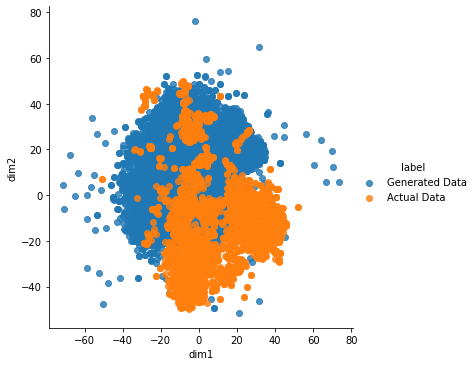

In [ ]:
from os import name
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import os
import glob
from sklearn.utils import shuffle
import seaborn as sns
from sklearn.datasets import make_moons
import os
import numpy as np
import pandas as pd

class ReadDatasets():
    def __init__(self, gendata_path, actualdata_path=None):
        self.data = gendata_path
        #self.preprocess(self.data)
        #if isinstance(actualdata_path, str):
        self.data2 = actualdata_path
        #self.preprocess(self.data2)
        print(self.data.shape)
        print(self.data2.shape)
        
    def preprocess(self, df):
        if 'Unnamed: 0' in list(df.columns.values):
            df.drop(['Unnamed: 0'], axis=1, inplace=True)

    def plot_tsne(self, name="ud", plotpath=None):
        gendata = self.data
        actual = self.data2
        if gendata.shape[0]!=actual.shape[0]:
            if gendata.shape[0]>actual.shape[0]:
                gendata = gendata.iloc[:actual.shape[0],:]
            else:
                actual = actual.iloc[:gendata.shape[0],:]
        n_patients, n_genes = gendata.shape
        label1 = ["Generated Data"]*n_patients
        label2 = ["Actual Data"]*n_patients
        labels = pd.Series(label1+label2).to_frame()
        dfeatures = pd.concat([gendata, actual], ignore_index=True,
                              axis=0, sort=False)
        X_embedded = TSNE(n_components=2, random_state=0,
                          perplexity=100).fit_transform(dfeatures)
        X_embedded = pd.DataFrame(X_embedded, columns=['dim1', 'dim2'])
        X_embedded = pd.DataFrame(
            np.hstack([np.array(X_embedded), np.array(labels)]))
        X_embedded.columns = ['dim1', 'dim2', 'label']

        sns_fig = sns.lmplot(x='dim1', y='dim2', data=X_embedded, fit_reg=False, hue='label')
        filename = "tsne_plot_"
        filename = filename + name + ".png"
        plt.show()#(filename)
        #plt.close()

    def plot_tsne2(self, name="ud", plotpath=None):
        actual = self.data2
        n_patients, n_genes = actual.shape
        label2 = ["Actual Data"]*n_patients
        labels = pd.Series(label2).to_frame()
        #dfeatures = pd.concat([gendata, actual], ignore_index=True,
        #                     axis=0, sort=False)
        X_embedded = TSNE(n_components=2, random_state=0,
                          perplexity=100).fit_transform(actual)
        X_embedded = pd.DataFrame(X_embedded, columns=['dim1', 'dim2'])
        X_embedded = pd.DataFrame(
            np.hstack([np.array(X_embedded), np.array(labels)]))
        X_embedded.columns = ['dim1', 'dim2', 'label']

        sns_fig = sns.lmplot(x='dim1', y='dim2', data=X_embedded, fit_reg=False, hue='label')
        filename = "tsne_plot_"
        filename = filename + name + ".png"
        plt.savefig(filename)
        plt.close()


if __name__=="__main__":
    rd = ReadDatasets(df_ctgan.iloc[:,:],df_org1.iloc[:,:])
    # print(X_res.shape,y_res.shape)
    # y_res = y_res.reshape((-1,1))
    # df_sm_ = pd.DataFrame(np.concatenate((X_res,y_res),axis=1),columns=df.columns,index=None)
    # df_sm = df_sm_[df_sm_["label"]==1].iloc[:,:-1]
    # df_sm = shuffle(df_sm)
    # df_sm = shuffle(df_sm)
    # df_sm = shuffle(df_sm)
    # df_org = df[df["label"]==1].iloc[:,:-1]
    # rd = ReadDatasets(df_sm.iloc[:,:],df_org.iloc[:,:])
    rd.plot_tsne(name="org5")


In [ ]:
df = df.iloc[:,2:]
df

,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12,Feature 13,Feature 14,Feature 15,Feature 16,Feature 17,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30,Feature 31,Feature 32,Feature 33,Feature 34,Feature 35,Feature 36,Feature 37,Feature 38,Feature 39,Feature 40,Feature 41,...,Feature 128,Feature 129,Feature 130,Feature 131,Feature 132,Feature 133,Feature 134,Feature 135,Feature 136,Feature 137,Feature 138,Feature 139,Feature 140,Feature 141,Feature 142,Feature 143,Feature 144,Feature 145,Feature 146,Feature 147,Feature 148,Feature 149,Feature 150,Feature 151,Feature 152,Feature 153,Feature 154,Feature 155,Feature 156,Feature 157,Feature 158,Feature 159,Feature 160,Feature 161,Feature 162,Feature 163,Feature 164,Feature 165,Feature 166,label
3,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,0.041399,0.935886,-0.098695,1.203038,0.988902,0.341693,-0.013282,-0.057392,0.058329,-0.032930,-0.042709,0.065455,0.324947,-0.139732,-0.148854,-0.080105,-0.155638,1.313051,1.106965,-0.139734,-0.148850,-0.080104,-0.155638,1.313130,1.106995,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227215,...,-0.093120,1.587690,1.586539,-0.101820,0.704558,0.448898,0.659662,0.311091,0.302198,-1.373962,-1.355393,-0.300941,-1.404583,0.064846,-0.035232,-0.168742,-0.442156,-0.416540,-0.418273,0.367605,0.392035,-0.968903,-1.943850,-1.059868,-1.678997,0.185597,0.185492,-0.169472,-0.470592,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117,2
9,-0.147852,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.137933,-0.144108,-0.049707,-0.140266,-0.028741,-0.035391,-0.042955,-0.013282,-0.006754,-0.148916,-0.151494,-0.146513,0.887058,0.884557,-0.139721,-0.148905,-0.080147,-0.155653,-0.010763,-0.012107,-0.139723,-0.148901,-0.080147,-0.155653,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227215,...,-0.127462,0.003143,0.002426,-0.115680,-0.190199,-0.177836,-0.201578,1.064205,1.063787,-1.373932,-1.356183,-0.301411,-1.404577,-0.975738,-0.975237,-0.168742,-0.445357,-0.409015,-0.427594,-1.015963,-1.016230,-0.968903,-1.943850,-1.059868,-1.678997,0.185597,0.185492,-0.216814,-0.617907,-0.577099,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,2
10,-0.151357,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.141519,-0.147643,-0.049707,-0.143847,-0.028741,-0.035391,-0.042955,-0.013282,-0.038424,-0.150266,-0.150457,-0.150661,0.887058,0.884557,-0.139722,-0.148906,-0.080147,-0.155654,-0.010763,-0.012107,-0.139724,-0.148902,-0.080147,-0.155654,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227215,...,-0.127462,0.003143,0.002426,-0.107516,-0.190820,-0.180486,-0.200607,1.064205,1.063787,-1.373902,-1.348835,-0.282308,-1.400475,-0.975738,-0.975237,-0.168742,-0.454961,-0.420758,-0.436915,-1.015963,-1.016230,-0.968903,-1.943850,-1.059868,-1.678997,0.185597,0.185492,-0.216814,-0.587217,-0.539735,-0.582077,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,2
11,-0.172621,-0.162277,0.463609,-0.046932,-0.043875,-0.029140,-0.061584,-0.163512,-0.169227,-0.048778,-0.165764,2.459222,2.415325,-0.042955,-0.013282,-0.056091,-0.170872,-0.172695,-0.175836,0.887058,0.884557,-0.139732,-0.148912,-0.080147,-0.155662,2.679386,2.665377,-0.139734,-0.148908,-0.080147,-0.155662,2.679448,2.665308,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227215,...,-0.124412,-3.872194,-3.871849,-0.124473,-0.182729,-0.166347,-0.194807,1.064205,1.063787,-1.373872,-1.349151,-0.283202,-1.400636,1.342003,1.340733,-0.159807,-0.451549,-0.419971,-0.430916,1.301966,1.301281,0.660117,0.146997,-0.453330,0.445895,1.488113,1.487932,-0.193143,-0.544250,-0.494897,-0.531617,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.1

In [ ]:
df_ctgan["label"] = 1
df_ctgan

,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12,Feature 13,Feature 14,Feature 15,Feature 16,Feature 17,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30,Feature 31,Feature 32,Feature 33,Feature 34,Feature 35,Feature 36,Feature 37,Feature 38,Feature 39,Feature 40,Feature 41,...,Feature 128,Feature 129,Feature 130,Feature 131,Feature 132,Feature 133,Feature 134,Feature 135,Feature 136,Feature 137,Feature 138,Feature 139,Feature 140,Feature 141,Feature 142,Feature 143,Feature 144,Feature 145,Feature 146,Feature 147,Feature 148,Feature 149,Feature 150,Feature 151,Feature 152,Feature 153,Feature 154,Feature 155,Feature 156,Feature 157,Feature 158,Feature 159,Feature 160,Feature 161,Feature 162,Feature 163,Feature 164,Feature 165,Feature 166,label
0,0.812433,0.233822,0.938797,-0.158913,-0.044201,0.004209,-0.065176,-0.201173,-0.114921,0.918663,0.457192,0.001957,-0.021991,0.314829,-0.013846,-0.029148,0.638936,-0.185365,-0.227762,-0.302940,0.852477,-0.127958,-0.157906,4.396854,-0.138764,-1.870528,-2.129480,0.429178,-0.146723,-0.143607,-0.161774,-0.015594,2.967509,-0.027434,-0.030539,0.000673,-0.021749,0.018559,-0.121043,-0.244808,...,-0.128535,0.046400,4.774252,0.795182,-0.204817,-0.232257,-0.227974,1.111389,1.035389,-0.490844,1.376069,-0.190435,-0.623200,1.308153,0.334131,-0.184332,0.204267,-0.371791,-0.392480,0.218329,0.207510,0.668225,0.645503,-1.011062,0.761520,0.191804,0.197212,1.033050,-0.845082,-0.607364,0.262055,0.240657,0.274079,-0.069278,-0.137429,-0.151098,-0.115841,-0.123955,-0.125682,1
1,0.115625,-0.177510,0.478585,0.376575,-0.033144,0.019237,-0.079820,-0.175263,0.136555,0.159473,0.375560,-2.058627,0.058720,0.154917,-0.015753,-0.020196,-0.176230,-0.203188,0.971564,-1.058707,0.895937,0.637429,-0.158861,3.704072,4.586995,-2.087262,-0.005480,-0.144086,-0.130428,0.562825,0.227898,1.273738,-0.030081,-0.028846,-0.025599,-0.003535,-0.034082,8.243325,-0.018116,1.836917,...,0.029460,-0.444204,1.327848,0.219055,-0.148168,0.695386,0.242118,1.154750,0.094325,0.491496,-0.677022,4.470660,0.951029,-0.664776,-0.968140,-0.226123,-0.338570,2.330309,-0.402782,-0.911803,-0.971882,-0.938018,-2.146697,1.494242,2.282509,1.595992,0.907089,6.466293,1.839353,1.318884,0.833206,0.239601,0.435582,-0.030799,-0.009725,0.187187,-0.196258,1.629293,1.592436,1
2,0.631144,-0.179367,-0.411252,-0.136466,0.119757,1.810484,-0.019089,-0.145054,0.216745,1.302051,2.491149,2.036325,1.367171,-0.068288,-0.011551,1.965727,-0.179456,-0.207162,-0.201468,-1.509524,-0.941753,-0.148589,-0.166518,-0.085824,-0.172216,-0.023754,-0.016600,-0.209126,3.052019,-0.053770,-0.178834,-0.017172,1.210748,-0.019601,-0.062018,-0.033426,-0.026960,-0.005098,-4.277249,8.286377,...,-0.062101,3.717740,-0.117123,-0.081691,-0.112305,-0.343734,0.230819,1.097830,0.281242,-0.063378,1.229611,2.590834,-0.137020,0.134048,-0.169384,-0.076664,5.179762,-0.348370,0.713041,1.179660,0.058492,2.103576,1.208052,2.022157,2.020082,1.550643,-1.088177,2.647076,-0.336449,-0.353094,-0.439690,-0.952323,-0.098133,-0.179803,-0.106130,-0.144190,-0.102660,-0.139663,1.496270,1
3,4.612458,-0.108030,2.545796,-0.107943,-0.010347,3.548427,-0.040765,3.028136,-0.182049,0.038760,1.616634,-1.313318,-0.047853,0.431188,-0.013336,0.026776,0.249380,0.676672,1.335203,0.236649,-1.329238,-0.160332,-0.151693,-0.078201,2.348944,0.820081,0.352980,-0.178754,-0.074079,-0.111477,0.011688,2.206045,-0.029202,-0.010692,-0.070046,-0.017329,-0.033342,-0.003010,-0.004280,2.635825,...,-0.114231,0.394375,0.014349,0.336731,0.081386,0.175853,5.552200,-0.304560,-0.346954,-0.199620,0.638120,3.720023,-0.725811,0.238335,0.202485,-0.171081,-0.480651,2.797339,2.401036,-0.322216,-0.084503,1.681488,-0.804970,-1.064608,-0.220121,0.145028,1.262790,-0.017185,-0.494089,0.628640,-0.507038,-0.940743,0.179343,0.003509,-0.126340,0.318981,0.498870,-1.560073,-0.093976,1
4,-0.158673,0.808555,-0.722333,1.754447,-0.

In [ ]:
df = pd.concat([df, df_ctgan])
df

,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12,Feature 13,Feature 14,Feature 15,Feature 16,Feature 17,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30,Feature 31,Feature 32,Feature 33,Feature 34,Feature 35,Feature 36,Feature 37,Feature 38,Feature 39,Feature 40,Feature 41,...,Feature 128,Feature 129,Feature 130,Feature 131,Feature 132,Feature 133,Feature 134,Feature 135,Feature 136,Feature 137,Feature 138,Feature 139,Feature 140,Feature 141,Feature 142,Feature 143,Feature 144,Feature 145,Feature 146,Feature 147,Feature 148,Feature 149,Feature 150,Feature 151,Feature 152,Feature 153,Feature 154,Feature 155,Feature 156,Feature 157,Feature 158,Feature 159,Feature 160,Feature 161,Feature 162,Feature 163,Feature 164,Feature 165,Feature 166,label
3,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,0.041399,0.935886,-0.098695,1.203038,0.988902,0.341693,-0.013282,-0.057392,0.058329,-0.032930,-0.042709,0.065455,0.324947,-0.139732,-0.148854,-0.080105,-0.155638,1.313051,1.106965,-0.139734,-0.148850,-0.080104,-0.155638,1.313130,1.106995,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227215,...,-0.093120,1.587690,1.586539,-0.101820,0.704558,0.448898,0.659662,0.311091,0.302198,-1.373962,-1.355393,-0.300941,-1.404583,0.064846,-0.035232,-0.168742,-0.442156,-0.416540,-0.418273,0.367605,0.392035,-0.968903,-1.943850,-1.059868,-1.678997,0.185597,0.185492,-0.169472,-0.470592,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117,2
9,-0.147852,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.137933,-0.144108,-0.049707,-0.140266,-0.028741,-0.035391,-0.042955,-0.013282,-0.006754,-0.148916,-0.151494,-0.146513,0.887058,0.884557,-0.139721,-0.148905,-0.080147,-0.155653,-0.010763,-0.012107,-0.139723,-0.148901,-0.080147,-0.155653,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227215,...,-0.127462,0.003143,0.002426,-0.115680,-0.190199,-0.177836,-0.201578,1.064205,1.063787,-1.373932,-1.356183,-0.301411,-1.404577,-0.975738,-0.975237,-0.168742,-0.445357,-0.409015,-0.427594,-1.015963,-1.016230,-0.968903,-1.943850,-1.059868,-1.678997,0.185597,0.185492,-0.216814,-0.617907,-0.577099,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,2
10,-0.151357,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.141519,-0.147643,-0.049707,-0.143847,-0.028741,-0.035391,-0.042955,-0.013282,-0.038424,-0.150266,-0.150457,-0.150661,0.887058,0.884557,-0.139722,-0.148906,-0.080147,-0.155654,-0.010763,-0.012107,-0.139724,-0.148902,-0.080147,-0.155654,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227215,...,-0.127462,0.003143,0.002426,-0.107516,-0.190820,-0.180486,-0.200607,1.064205,1.063787,-1.373902,-1.348835,-0.282308,-1.400475,-0.975738,-0.975237,-0.168742,-0.454961,-0.420758,-0.436915,-1.015963,-1.016230,-0.968903,-1.943850,-1.059868,-1.678997,0.185597,0.185492,-0.216814,-0.587217,-0.539735,-0.582077,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,2
11,-0.172621,-0.162277,0.463609,-0.046932,-0.043875,-0.029140,-0.061584,-0.163512,-0.169227,-0.048778,-0.165764,2.459222,2.415325,-0.042955,-0.013282,-0.056091,-0.170872,-0.172695,-0.175836,0.887058,0.884557,-0.139732,-0.148912,-0.080147,-0.155662,2.679386,2.665377,-0.139734,-0.148908,-0.080147,-0.155662,2.679448,2.665308,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227215,...,-0.124412,-3.872194,-3.871849,-0.124473,-0.182729,-0.166347,-0.194807,1.064205,1.063787,-1.373872,-1.349151,-0.283202,-1.400636,1.342003,1.340733,-0.159807,-0.451549,-0.419971,-0.430916,1.301966,1.301281,0.660117,0.146997,-0.453330,0.445895,1.488113,1.487932,-0.193143,-0.544250,-0.494897,-0.531617,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.1

In [ ]:
import sklearn
df = sklearn.utils.shuffle(df)
df

,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12,Feature 13,Feature 14,Feature 15,Feature 16,Feature 17,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30,Feature 31,Feature 32,Feature 33,Feature 34,Feature 35,Feature 36,Feature 37,Feature 38,Feature 39,Feature 40,Feature 41,...,Feature 128,Feature 129,Feature 130,Feature 131,Feature 132,Feature 133,Feature 134,Feature 135,Feature 136,Feature 137,Feature 138,Feature 139,Feature 140,Feature 141,Feature 142,Feature 143,Feature 144,Feature 145,Feature 146,Feature 147,Feature 148,Feature 149,Feature 150,Feature 151,Feature 152,Feature 153,Feature 154,Feature 155,Feature 156,Feature 157,Feature 158,Feature 159,Feature 160,Feature 161,Feature 162,Feature 163,Feature 164,Feature 165,Feature 166,label
13189,0.463863,-0.144388,1.618550,3.858903,-0.044649,-0.066647,-0.072046,0.375227,-0.168543,-0.026532,0.514208,-0.389375,-2.887345,0.003797,-0.014043,-0.039150,4.045067,0.570262,-0.170402,-1.403542,-0.298689,-0.156883,-0.169108,-0.076507,0.951817,-0.531918,-0.488554,1.151201,-0.152721,-0.093864,-0.179530,2.376748,0.831446,-0.020610,-0.032194,-0.010434,-0.034178,-0.005903,-0.014945,2.552934,...,-0.123718,-0.012971,-0.983290,0.652991,0.160986,3.250475,-0.217564,-0.295715,-1.152058,-0.589187,-0.415521,-0.309545,0.473122,0.165285,0.188385,5.928772,2.764095,-0.371408,-0.476801,-0.958545,0.190368,-0.330761,2.076572,1.461375,0.217823,0.406584,-0.304335,-0.218346,-0.470592,1.517180,0.547116,0.730795,1.605633,-0.047411,1.425639,-0.059484,0.021948,-0.089775,1.220537,1
187925,-0.172684,-0.076468,-0.091383,-0.121970,-0.043875,-0.113002,-0.061584,-0.163337,-0.169156,-0.049707,-0.165641,-0.028741,-0.035391,-0.042955,-0.013282,-0.055362,-0.170988,-0.172889,-0.175911,-1.373657,-1.371460,0.862152,0.490381,-0.080147,0.693277,-0.010763,-0.012107,0.862302,0.490428,-0.080147,0.693368,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,1.970377,...,-0.127462,0.003143,0.002426,-0.124532,-0.185488,-0.169836,-0.197990,-1.159649,-1.160129,1.283612,1.366832,0.706550,1.409927,-0.975738,-0.975237,-0.125569,2.434401,3.095899,2.380565,-1.015963,-1.016230,0.117111,1.192421,1.366287,0.749451,-1.116918,-1.116948,-0.216814,0.327365,0.573735,0.357732,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,2
10177,0.204773,-0.127943,1.533243,1.126206,-0.018337,-0.115171,-0.057407,-0.144423,-0.091546,-0.035605,-0.141160,-0.053333,-0.043964,-0.039648,-0.012896,0.038637,0.559338,-0.169253,-0.169657,0.958689,-1.396280,2.207969,-0.159353,-0.048957,-0.186390,-2.515355,0.000570,1.374402,3.882765,0.551074,-0.131912,-2.154727,-0.140378,-0.035174,-0.044209,-0.042665,-0.034779,0.001701,0.237309,0.918843,...,2.307112,-0.025088,-0.738708,-0.120081,-0.046479,0.212054,-0.171657,-1.173713,-1.039212,0.999802,1.745554,2.941114,0.480674,-0.115490,-0.928747,-0.216079,0.094865,-0.238129,1.982153,-0.351125,0.914201,-0.457181,-1.960401,0.431252,0.063454,0.198664,0.239718,5.569212,-0.624614,-0.513008,0.075203,-0.570766,0.289116,0.018472,2.233112,-0.110468,-0.008676,-0.122917,-1.267527,1
2057,-0.107804,2.665012,1.458184,-0.128801,0.249146,-0.094922,5.379959,-0.130903,-0.160211,-0.034217,0.014358,-0.073443,-0.007639,-0.055925,-0.012379,0.067388,-0.138946,-0.159537,-0.158066,-1.285246,-0.212626,4.884493,-0.156543,-0.057140,-0.186416,-0.042478,0.002298,-0.149295,0.022933,-0.049724,0.462316,-0.006313,0.426908,-0.031297,-0.105534,-0.001355,-0.030688,-5.795922,-0.015923,1.612769,...,11.082824,2.699435,0.003648,0.240854,3.165836,-0.089925,0.706686,0.819931,-0.555667,0.925925,0.812598,2.262446,-0.162354,0.188332,0.851973,-0.103883,1.213242,-0.401085,3.165243,1.190894,1.350095,-1.042095,1.512081,-1.135492,-0.502987,1.444929,-1.097166,-0.175373,0.399101,2.532828,-0.309146,0.196150,-1.000452,-0.092510,-0.032419,0.514685,-0.142447,-0.147936,-0.166841,1
11144

In [53]:
X = df.iloc[:,:-1]
y = df.iloc[:,[-1]]

In [54]:
y

,label
3,2
9,2
10,2
11,2
16,2
...,...
203752,2
203754,2
203759,1
203763,2


In [ ]:
print(X_res.shape, y_res.shape)

(84038, 167) (84038,)


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[  115  1088]
 [  380 10283]]
              precision    recall  f1-score   support

           1       0.23      0.10      0.14      1203
           2       0.90      0.96      0.93     10663

    accuracy                           0.88     11866
   macro avg       0.57      0.53      0.53     11866
weighted avg       0.84      0.88      0.85     11866

[0.13545347 0.93337569]


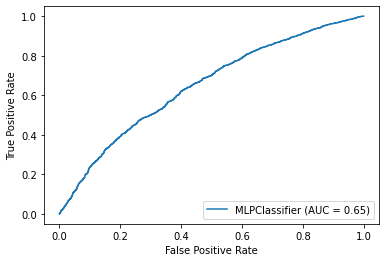

0.5299785485799396

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import sklearn
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier().fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(sklearn.metrics.f1_score(y_test, y_pred, average=None))
metrics.plot_roc_curve(clf, X_test, y_test)  # doctest: +SKIP
#plt.savefig("roc_rf")
plt.show()  
roc_auc_score(y_test, y_pred)

In [ ]:
df_tlol = df.loc[df["label"]==1]
df_tlol = df_tlol.iloc[:,:-1]
df_tlol

,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12,Feature 13,Feature 14,Feature 15,Feature 16,Feature 17,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30,Feature 31,Feature 32,Feature 33,Feature 34,Feature 35,Feature 36,Feature 37,Feature 38,Feature 39,Feature 40,Feature 41,...,Feature 127,Feature 128,Feature 129,Feature 130,Feature 131,Feature 132,Feature 133,Feature 134,Feature 135,Feature 136,Feature 137,Feature 138,Feature 139,Feature 140,Feature 141,Feature 142,Feature 143,Feature 144,Feature 145,Feature 146,Feature 147,Feature 148,Feature 149,Feature 150,Feature 151,Feature 152,Feature 153,Feature 154,Feature 155,Feature 156,Feature 157,Feature 158,Feature 159,Feature 160,Feature 161,Feature 162,Feature 163,Feature 164,Feature 165,Feature 166
907,-0.112367,0.391015,0.463609,1.829006,-0.043875,1.731967,0.547008,-0.163581,-0.144008,0.014275,-0.163655,0.315018,-0.384210,-0.042955,-0.013282,-0.056489,-0.108896,-0.101434,-0.104502,0.887058,0.884557,-0.139732,-0.148905,-0.080144,-0.155661,0.651312,0.790402,-0.139734,-0.148900,-0.080144,-0.155661,0.651398,0.790453,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227215,...,-0.094217,-0.127236,-0.083312,0.704113,0.026712,-0.170246,-0.184969,-0.149256,1.064205,1.063787,-1.373782,-1.354445,-0.297219,-1.403537,-0.975738,-0.975237,-0.168742,-0.417588,-0.375059,-0.400640,-1.015963,-1.016230,-0.968903,0.146997,1.366287,-0.464773,-1.116918,-1.116948,-0.193143,-0.513559,-0.457532,-0.500080,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1361,-0.172300,-0.184668,-1.201369,-0.046932,-0.024025,-0.029140,-0.061584,-0.163643,-0.168774,-0.043462,-0.165601,-2.516705,-2.486106,-0.022711,-0.013282,-0.057373,-0.170453,-0.172256,-0.175726,-1.222231,-1.371460,-0.139732,-0.148912,-0.080147,-0.155662,-2.700912,-2.689592,-0.139734,-0.148907,-0.080146,-0.155662,-2.700785,-2.689318,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227215,...,-0.095439,-0.126446,3.878480,3.876702,-0.124877,-0.200078,-0.188373,-0.214717,0.017182,0.507808,-1.373782,-1.354866,-0.299003,-1.403996,1.206586,1.340733,-0.168742,-0.457150,-0.423661,-0.439367,0.143001,0.142525,-0.968903,0.146997,0.921079,-0.869515,0.185597,0.185492,-0.193143,-0.611769,-0.577099,-0.600999,0.241128,0.241406,0.018279,-0.068266,-0.093204,-0.068808,1.299939,1.301521
2718,-0.172493,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.163144,-0.168965,-0.049707,-0.165448,-0.028741,-0.035391,-0.042955,-0.013282,-0.057283,-0.170655,-0.172349,-0.175684,0.887058,0.884557,-0.139732,-0.148912,-0.080147,-0.155662,-0.010763,-0.012107,-0.139733,-0.148907,-0.080147,-0.155662,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227092,...,-0.097719,-0.127462,0.003143,0.002426,-0.123629,-0.191715,-0.177949,-0.204961,-1.159649,-1.160129,-1.373962,-1.313566,-0.190163,-1.380885,-0.975738,-0.975237,-0.168742,-0.306917,-0.239734,-0.293220,-1.015963,-1.016230,-0.968903,0.669709,1.972826,-0.161217,-1.116918,-1.116948,-0.216814,-0.102304,0.050628,-0.083789,-0.979074,-0.978556,-0.098889,-0.087490,-0.084674,-0.140597,1.519700,1.521399
2815,-0.158104,-0.166548,-0.646376,-0.046932,-0.063725,-0.029140,-0.061584,-0.158748,-0.159279,-0.000826,-0.158346,2.459222,2.415325,-0.063200,-0.013282,0.157678,-0.155854,-0.172908,-0.141035,-0.243300,-0.243452,-0.139170,-0.147836,-0.079120,-0.154709,-2.700912,-2.689592,-0.139172,-0.147831,-0.079119,-0.154709,-2.700785,-2.689318,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.225673,...,-0.095439,-0.128479,3.878480,3.876702,0.032690,-0.172124,-0.188716,-0.150180,-0.047722,-0.048171,-1.373483,-1.355920,-0.301754,-1.404211,0.183133,0.182748,-0.068298,-0.427031,-0.424672,-0.379589,0.143001,0.142525,1.203124,0.146997,-1.059868,0.749451,0.185597,0.185492,-0.003773,-0.562664,-0.577099,-0.5000

In [ ]:
df_tlol.to_csv("label1_trans.csv")

In [ ]:
X = df.iloc[:,2:-1]
y = df.iloc[:,[-1]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3)

In [ ]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '2': {}".format(sum(y_train_res == 2))) 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (58844, 165)
After OverSampling, the shape of train_y: (58844,) 

After OverSampling, counts of label '1': 29422
After OverSampling, counts of label '2': 29422


/bin/bash: matplotlib: command not found
[[  225  1148]
 [  579 12018]]
              precision    recall  f1-score   support

           1       0.28      0.16      0.21      1373
           2       0.91      0.95      0.93     12597

    accuracy                           0.88     13970
   macro avg       0.60      0.56      0.57     13970
weighted avg       0.85      0.88      0.86     13970



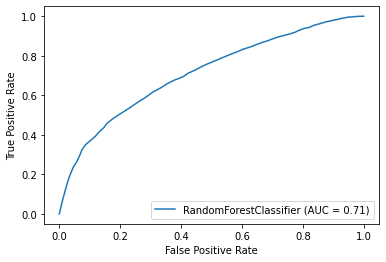

0.5589557011371799

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
clf = RandomForestClassifier().fit(X_train_res, y_train_res)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
metrics.plot_roc_curve(clf, X_test, y_test)  # doctest: +SKIP
#plt.savefig("roc_rf")
plt.show()  
roc_auc_score(y_test, y_pred)

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

df_t = df_tlol#(df.loc[df["label"]==1]).iloc[:,2:-1]
df_x = df_t
df_l = df_t.values
print(df_l.shape)
#pca = PCA(0.99)
#data = pca.fit_transform(df_l)
gmm = GaussianMixture(6, covariance_type='full')
# n_components = np.arange(1, 21)
# models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(df_l)
#           for n in n_components]


gmm.fit(df_l)
print(gmm.converged_)
data_new = gmm.sample(20000)
print(data_new[0])
#digits_new = pca.inverse_transform(data_new[0])
df2_gen = pd.DataFrame(data_new[0], columns=df_x.columns, index=None)
df2_gen

(4035, 165)
True
[[ 0.04017666  0.0651844   1.50805736 ...  0.35567995 -1.54256758
  -1.41173546]
 [-0.21518651 -0.31869541  0.03836075 ... -0.14882423  1.07163943
   0.78229381]
 [ 0.09735262 -0.5662878   0.61075775 ...  0.06309224  0.47337827
   0.61327563]
 ...
 [-0.05661969 -0.1172759   0.50650248 ... -0.39769062  0.88905127
   0.88340706]
 [-0.05960897 -0.18817007  1.91770473 ...  0.4810214  -0.04222861
  -0.0233829 ]
 [-0.30139603 -0.00809132  0.80031046 ...  0.27446179  1.1869849
   1.21012399]]


,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12,Feature 13,Feature 14,Feature 15,Feature 16,Feature 17,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30,Feature 31,Feature 32,Feature 33,Feature 34,Feature 35,Feature 36,Feature 37,Feature 38,Feature 39,Feature 40,Feature 41,...,Feature 127,Feature 128,Feature 129,Feature 130,Feature 131,Feature 132,Feature 133,Feature 134,Feature 135,Feature 136,Feature 137,Feature 138,Feature 139,Feature 140,Feature 141,Feature 142,Feature 143,Feature 144,Feature 145,Feature 146,Feature 147,Feature 148,Feature 149,Feature 150,Feature 151,Feature 152,Feature 153,Feature 154,Feature 155,Feature 156,Feature 157,Feature 158,Feature 159,Feature 160,Feature 161,Feature 162,Feature 163,Feature 164,Feature 165,Feature 166
0,0.040177,0.065184,1.508057,0.494660,-0.052917,0.551690,-0.013153,0.066532,0.055946,-0.045334,0.064547,1.795210,1.593937,-0.055230,-0.012379,0.020229,0.038659,-0.071999,-0.104869,-0.357305,-0.109315,-0.756378,-0.549820,-0.105049,-0.691979,1.003448,0.625374,-0.755842,-0.549322,-0.105727,-0.692813,1.002675,0.630280,-0.036679,-0.040239,-0.021674,-0.038287,-0.840402,-1.091613,-0.254940,...,0.381602,0.263124,-1.420061,-1.456898,-0.050648,0.093308,0.082700,0.020101,0.430053,0.536085,-0.054916,0.577132,0.718371,0.038832,-0.566116,-0.354751,-0.141321,-0.558689,-0.017278,0.002541,0.147186,-0.471967,0.049284,0.120717,0.005634,-0.187048,-0.554539,-0.517710,-0.146655,-0.600960,-0.520687,-0.271968,0.382492,0.108136,0.058415,0.142082,0.225156,0.355680,-1.542568,-1.411735
1,-0.215187,-0.318695,0.038361,0.067799,-0.196773,0.131341,-0.109183,-0.235236,-0.216356,0.143279,-0.227888,-0.056708,0.261831,-0.197320,-0.013193,0.121783,-0.246922,-0.272613,-0.224109,0.346467,0.555807,1.262529,0.694884,-0.120657,1.017504,0.658936,0.404421,1.261775,0.695730,-0.121452,1.018774,0.659365,0.404362,0.076148,0.065758,-0.022709,0.070864,0.063547,-0.021689,-0.055868,...,0.561311,0.120921,0.429583,0.239724,-0.010372,-0.310894,-0.166500,-0.002837,1.498176,0.893789,-0.489219,-1.495478,-1.418529,-0.672208,-0.169302,0.074165,-0.479551,-0.631481,-0.073827,0.195898,0.370398,0.793141,-0.384921,-1.070642,-0.244409,-0.782554,-0.187517,-0.038148,-0.434130,1.371043,1.025016,0.158226,-0.157450,-0.137637,0.086385,-0.319162,-0.396278,-0.148824,1.071639,0.782294
2,0.097353,-0.566288,0.610758,0.008836,-0.375574,0.027003,0.011046,0.081837,0.099916,0.127248,0.087210,0.058393,0.182931,-0.379608,-0.012184,-0.032600,0.093040,-0.029258,-0.102836,-0.163266,0.049383,-0.021775,-0.054378,-0.053710,-0.041349,0.334710,0.554831,-0.021132,-0.054274,-0.054745,-0.039886,0.336257,0.556721,0.017322,0.008271,-0.023146,0.014826,0.333086,0.339782,-0.215662,...,-0.448866,-0.280774,-3.040275,-2.575757,-0.042812,-0.070339,0.116526,-0.059092,-0.096947,-0.017697,-0.752644,-2.300624,-1.963781,-1.062405,0.646059,0.339664,-0.120523,-1.485253,-1.301880,-1.532897,-0.524310,-0.605258,0.223877,-0.774707,-0.378256,-0.277716,-0.572696,-0.695708,-0.156812,-0.763777,-0.228748,-1.210431,-0.251817,-0.060735,0.205379,-0.378897,-0.273574,0.063092,0.473378,0.613276
3,0.078015,0.549470,-0.477829,-0.053417,0.143141,-0.004605,-0.166206,0.127795,0.084726,-0.241262,0.116707,-1.791271,-2.171927,0.150891,-0.013694,-0.214761,0.076666,0.034207,-0.051310,-0.282239,-0.274072,0.594338,0.274886,-0.105264,0.461115,-1.139226,-1.856581,0.595654,0.275949,-0.105480,0.458502,-1.141449,-1.857214,-0.024400,-0.031083,-0.023816,-0.024774,-0.974750,-0.903335,-0.145615,...,0.010386,-0.032351,1.230293,1.139596,-0.154230,-0.555117,-0.532247,-0.525433,0.325275,0.844123,0.005709,0.046810,-0.390330,-0.050708,0.414994,0.374580,-0.187048,0.597828,0.184490,-0.309364,1.283301,1.013017,-1.283083,0.024034,0.574646,-0.283418,-0.612129,-0.453531,-0.293236,1.704318,0.994212,0.248568,0.484671,0.386570,-0.098069,-0.018465,-0.201620,-0.435880,-0.767013,-0.475070

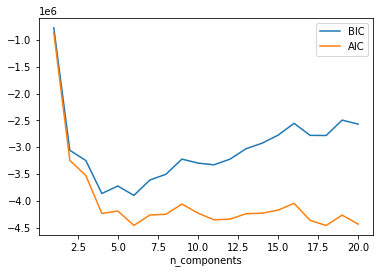

In [ ]:
plt.plot(n_components, [m.bic(df_l) for m in models], label='BIC')
plt.plot(n_components, [m.aic(df_l) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.show()

In [ ]:
df_tlol = df.loc[df["label"]==1]
df_tlol = df_tlol.iloc[:,2:-1]
print(df2_gen.shape)
print(df_tlol.shape)
df_tlol

(20000, 165)
(4545, 165)


,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12,Feature 13,Feature 14,Feature 15,Feature 16,Feature 17,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30,Feature 31,Feature 32,Feature 33,Feature 34,Feature 35,Feature 36,Feature 37,Feature 38,Feature 39,Feature 40,Feature 41,...,Feature 127,Feature 128,Feature 129,Feature 130,Feature 131,Feature 132,Feature 133,Feature 134,Feature 135,Feature 136,Feature 137,Feature 138,Feature 139,Feature 140,Feature 141,Feature 142,Feature 143,Feature 144,Feature 145,Feature 146,Feature 147,Feature 148,Feature 149,Feature 150,Feature 151,Feature 152,Feature 153,Feature 154,Feature 155,Feature 156,Feature 157,Feature 158,Feature 159,Feature 160,Feature 161,Feature 162,Feature 163,Feature 164,Feature 165,Feature 166
907,-0.112367,0.391015,0.463609,1.829006,-0.043875,1.731967,0.547008,-0.163581,-0.144008,0.014275,-0.163655,0.315018,-0.384210,-0.042955,-0.013282,-0.056489,-0.108896,-0.101434,-0.104502,0.887058,0.884557,-0.139732,-0.148905,-0.080144,-0.155661,0.651312,0.790402,-0.139734,-0.148900,-0.080144,-0.155661,0.651398,0.790453,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227215,...,-0.094217,-0.127236,-0.083312,0.704113,0.026712,-0.170246,-0.184969,-0.149256,1.064205,1.063787,-1.373782,-1.354445,-0.297219,-1.403537,-0.975738,-0.975237,-0.168742,-0.417588,-0.375059,-0.400640,-1.015963,-1.016230,-0.968903,0.146997,1.366287,-0.464773,-1.116918,-1.116948,-0.193143,-0.513559,-0.457532,-0.500080,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1361,-0.172300,-0.184668,-1.201369,-0.046932,-0.024025,-0.029140,-0.061584,-0.163643,-0.168774,-0.043462,-0.165601,-2.516705,-2.486106,-0.022711,-0.013282,-0.057373,-0.170453,-0.172256,-0.175726,-1.222231,-1.371460,-0.139732,-0.148912,-0.080147,-0.155662,-2.700912,-2.689592,-0.139734,-0.148907,-0.080146,-0.155662,-2.700785,-2.689318,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227215,...,-0.095439,-0.126446,3.878480,3.876702,-0.124877,-0.200078,-0.188373,-0.214717,0.017182,0.507808,-1.373782,-1.354866,-0.299003,-1.403996,1.206586,1.340733,-0.168742,-0.457150,-0.423661,-0.439367,0.143001,0.142525,-0.968903,0.146997,0.921079,-0.869515,0.185597,0.185492,-0.193143,-0.611769,-0.577099,-0.600999,0.241128,0.241406,0.018279,-0.068266,-0.093204,-0.068808,1.299939,1.301521
2718,-0.172493,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.163144,-0.168965,-0.049707,-0.165448,-0.028741,-0.035391,-0.042955,-0.013282,-0.057283,-0.170655,-0.172349,-0.175684,0.887058,0.884557,-0.139732,-0.148912,-0.080147,-0.155662,-0.010763,-0.012107,-0.139733,-0.148907,-0.080147,-0.155662,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227092,...,-0.097719,-0.127462,0.003143,0.002426,-0.123629,-0.191715,-0.177949,-0.204961,-1.159649,-1.160129,-1.373962,-1.313566,-0.190163,-1.380885,-0.975738,-0.975237,-0.168742,-0.306917,-0.239734,-0.293220,-1.015963,-1.016230,-0.968903,0.669709,1.972826,-0.161217,-1.116918,-1.116948,-0.216814,-0.102304,0.050628,-0.083789,-0.979074,-0.978556,-0.098889,-0.087490,-0.084674,-0.140597,1.519700,1.521399
2815,-0.158104,-0.166548,-0.646376,-0.046932,-0.063725,-0.029140,-0.061584,-0.158748,-0.159279,-0.000826,-0.158346,2.459222,2.415325,-0.063200,-0.013282,0.157678,-0.155854,-0.172908,-0.141035,-0.243300,-0.243452,-0.139170,-0.147836,-0.079120,-0.154709,-2.700912,-2.689592,-0.139172,-0.147831,-0.079119,-0.154709,-2.700785,-2.689318,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.225673,...,-0.095439,-0.128479,3.878480,3.876702,0.032690,-0.172124,-0.188716,-0.150180,-0.047722,-0.048171,-1.373483,-1.355920,-0.301754,-1.404211,0.183133,0.182748,-0.068298,-0.427031,-0.424672,-0.379589,0.143001,0.142525,1.203124,0.146997,-1.059868,0.749451,0.185597,0.185492,-0.003773,-0.562664,-0.577099,-0.5000

(20000, 165)
(4035, 165)


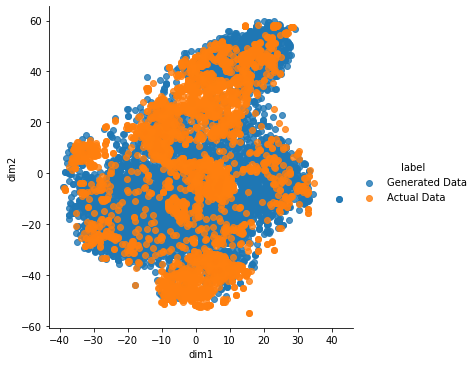

In [ ]:
from os import name
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import os
import glob
import seaborn as sns
from sklearn.datasets import make_moons
import os
import numpy as np
import pandas as pd

class ReadDatasets():
    def __init__(self, gendata_path, actualdata_path=None):
        self.data = gendata_path
        #self.preprocess(self.data)
        #if isinstance(actualdata_path, str):
        self.data2 = actualdata_path
        #self.preprocess(self.data2)
        print(self.data.shape)
        print(self.data2.shape)
        
    def preprocess(self, df):
        if 'Unnamed: 0' in list(df.columns.values):
            df.drop(['Unnamed: 0'], axis=1, inplace=True)

    def plot_tsne(self, name="ud", plotpath=None):
        gendata = self.data
        actual = self.data2
        if gendata.shape[0]!=actual.shape[0]:
            if gendata.shape[0]>actual.shape[0]:
                gendata = gendata.iloc[:actual.shape[0],:]
            else:
                actual = actual.iloc[:gendata.shape[0],:]
        n_patients, n_genes = gendata.shape
        label1 = ["Generated Data"]*n_patients
        label2 = ["Actual Data"]*n_patients
        labels = pd.Series(label1+label2).to_frame()
        dfeatures = pd.concat([gendata, actual], ignore_index=True,
                              axis=0, sort=False)
        X_embedded = TSNE(n_components=2, random_state=0,
                          perplexity=100).fit_transform(dfeatures)
        X_embedded = pd.DataFrame(X_embedded, columns=['dim1', 'dim2'])
        X_embedded = pd.DataFrame(
            np.hstack([np.array(X_embedded), np.array(labels)]))
        X_embedded.columns = ['dim1', 'dim2', 'label']

        sns_fig = sns.lmplot(x='dim1', y='dim2', data=X_embedded, fit_reg=False, hue='label')
        filename = "tsne_plot_"
        filename = filename + name + ".png"
        plt.show()#(filename)
        #plt.close()

    def plot_tsne2(self, name="ud", plotpath=None):
        actual = self.data2
        n_patients, n_genes = actual.shape
        label2 = ["Actual Data"]*n_patients
        labels = pd.Series(label2).to_frame()
        #dfeatures = pd.concat([gendata, actual], ignore_index=True,
        #                     axis=0, sort=False)
        X_embedded = TSNE(n_components=2, random_state=0,
                          perplexity=100).fit_transform(actual)
        X_embedded = pd.DataFrame(X_embedded, columns=['dim1', 'dim2'])
        X_embedded = pd.DataFrame(
            np.hstack([np.array(X_embedded), np.array(labels)]))
        X_embedded.columns = ['dim1', 'dim2', 'label']

        sns_fig = sns.lmplot(x='dim1', y='dim2', data=X_embedded, fit_reg=False, hue='label')
        filename = "tsne_plot_"
        filename = filename + name + ".png"
        plt.savefig(filename)
        plt.close()


if __name__=="__main__":
    rd = ReadDatasets(df2_gen.iloc[:,:],df_tlol.iloc[:,:])
    rd.plot_tsne(name="org4")


In [ ]:
df2_gen["label"] = 1
df2_gen

,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12,Feature 13,Feature 14,Feature 15,Feature 16,Feature 17,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30,Feature 31,Feature 32,Feature 33,Feature 34,Feature 35,Feature 36,Feature 37,Feature 38,Feature 39,Feature 40,Feature 41,...,Feature 128,Feature 129,Feature 130,Feature 131,Feature 132,Feature 133,Feature 134,Feature 135,Feature 136,Feature 137,Feature 138,Feature 139,Feature 140,Feature 141,Feature 142,Feature 143,Feature 144,Feature 145,Feature 146,Feature 147,Feature 148,Feature 149,Feature 150,Feature 151,Feature 152,Feature 153,Feature 154,Feature 155,Feature 156,Feature 157,Feature 158,Feature 159,Feature 160,Feature 161,Feature 162,Feature 163,Feature 164,Feature 165,Feature 166,label
0,0.040177,0.065184,1.508057,0.494660,-0.052917,0.551690,-0.013153,0.066532,0.055946,-0.045334,0.064547,1.795210,1.593937,-0.055230,-0.012379,0.020229,0.038659,-0.071999,-0.104869,-0.357305,-0.109315,-0.756378,-0.549820,-0.105049,-0.691979,1.003448,0.625374,-0.755842,-0.549322,-0.105727,-0.692813,1.002675,0.630280,-0.036679,-0.040239,-0.021674,-0.038287,-0.840402,-1.091613,-0.254940,...,0.263124,-1.420061,-1.456898,-0.050648,0.093308,0.082700,0.020101,0.430053,0.536085,-0.054916,0.577132,0.718371,0.038832,-0.566116,-0.354751,-0.141321,-0.558689,-0.017278,0.002541,0.147186,-0.471967,0.049284,0.120717,0.005634,-0.187048,-0.554539,-0.517710,-0.146655,-0.600960,-0.520687,-0.271968,0.382492,0.108136,0.058415,0.142082,0.225156,0.355680,-1.542568,-1.411735,1
1,-0.215187,-0.318695,0.038361,0.067799,-0.196773,0.131341,-0.109183,-0.235236,-0.216356,0.143279,-0.227888,-0.056708,0.261831,-0.197320,-0.013193,0.121783,-0.246922,-0.272613,-0.224109,0.346467,0.555807,1.262529,0.694884,-0.120657,1.017504,0.658936,0.404421,1.261775,0.695730,-0.121452,1.018774,0.659365,0.404362,0.076148,0.065758,-0.022709,0.070864,0.063547,-0.021689,-0.055868,...,0.120921,0.429583,0.239724,-0.010372,-0.310894,-0.166500,-0.002837,1.498176,0.893789,-0.489219,-1.495478,-1.418529,-0.672208,-0.169302,0.074165,-0.479551,-0.631481,-0.073827,0.195898,0.370398,0.793141,-0.384921,-1.070642,-0.244409,-0.782554,-0.187517,-0.038148,-0.434130,1.371043,1.025016,0.158226,-0.157450,-0.137637,0.086385,-0.319162,-0.396278,-0.148824,1.071639,0.782294,1
2,0.097353,-0.566288,0.610758,0.008836,-0.375574,0.027003,0.011046,0.081837,0.099916,0.127248,0.087210,0.058393,0.182931,-0.379608,-0.012184,-0.032600,0.093040,-0.029258,-0.102836,-0.163266,0.049383,-0.021775,-0.054378,-0.053710,-0.041349,0.334710,0.554831,-0.021132,-0.054274,-0.054745,-0.039886,0.336257,0.556721,0.017322,0.008271,-0.023146,0.014826,0.333086,0.339782,-0.215662,...,-0.280774,-3.040275,-2.575757,-0.042812,-0.070339,0.116526,-0.059092,-0.096947,-0.017697,-0.752644,-2.300624,-1.963781,-1.062405,0.646059,0.339664,-0.120523,-1.485253,-1.301880,-1.532897,-0.524310,-0.605258,0.223877,-0.774707,-0.378256,-0.277716,-0.572696,-0.695708,-0.156812,-0.763777,-0.228748,-1.210431,-0.251817,-0.060735,0.205379,-0.378897,-0.273574,0.063092,0.473378,0.613276,1
3,0.078015,0.549470,-0.477829,-0.053417,0.143141,-0.004605,-0.166206,0.127795,0.084726,-0.241262,0.116707,-1.791271,-2.171927,0.150891,-0.013694,-0.214761,0.076666,0.034207,-0.051310,-0.282239,-0.274072,0.594338,0.274886,-0.105264,0.461115,-1.139226,-1.856581,0.595654,0.275949,-0.105480,0.458502,-1.141449,-1.857214,-0.024400,-0.031083,-0.023816,-0.024774,-0.974750,-0.903335,-0.145615,...,-0.032351,1.230293,1.139596,-0.154230,-0.555117,-0.532247,-0.525433,0.325275,0.844123,0.005709,0.046810,-0.390330,-0.050708,0.414994,0.374580,-0.187048,0.597828,0.184490,-0.309364,1.283301,1.013017,-1.283083,0.024034,0.574646,-0.283418,-0.612129,-0.453531,-0.293236,1.704318,0.994212,0.248568,0.484671,0.386570,-0.098069,-0.018465,-0.201620,-0.435880,-0.767013,-0.475070,1
4,0.238781,-0.982375,0.647558,-0.3

In [ ]:
df_licit_org = df[df["label"]==2]
df_illicit_gen = df2_gen
df_illicit_org = df[df["label"]==1]
print(df_licit_org, df_illicit_gen, df_illicit_org)


        Feature 2  Feature 3  Feature 4  ...  Feature 165  Feature 166  label
3        1.011523  -0.081127  -1.201369  ...     0.178136     0.179117      2
9       -0.147852  -0.184668  -1.201369  ...    -0.120613    -0.119792      2
10      -0.151357  -0.184668  -1.201369  ...    -0.120613    -0.119792      2
11      -0.172621  -0.162277   0.463609  ...    -0.120613    -0.119792      2
16      -0.172304  -0.184668  -1.201369  ...    -0.120613    -0.119792      2
...           ...        ...        ...  ...          ...          ...    ...
203740  -0.169450  -0.116189   1.018602  ...    -0.120613    -0.119792      2
203750  -0.172743  -0.102765   1.018602  ...    -0.120613    -0.119792      2
203752  -0.172725  -0.113743  -0.091383  ...    -1.760926    -1.760984      2
203754  -0.172930  -0.149684   1.018602  ...    -0.120613    -0.119792      2
203763  -0.145771  -0.163752   0.463609  ...    -0.120613    -0.119792      2

[35517 rows x 166 columns]        Feature 2  Feature 3  Feature

In [ ]:
df_licit_org = shuffle(df_licit_org)
df_licit_train = df_licit_org.iloc[:25000,:]
df_licit_test = df_licit_org.iloc[25000:,:]
df_train = pd.concat([df_licit_train, df_illicit_gen])
df_test = pd.concat([df_licit_test, df_illicit_org])
df_train = shuffle(df_train)
df_test = shuffle(df_test)
print(df_train[df_train["label"]==1])
print(df_test[df_test["label"]==1])

       Feature 2  Feature 3  Feature 4  ...  Feature 165  Feature 166  label
3093    0.045891   0.558128   1.559340  ...     0.781234     0.790105      1
538     0.154072  -0.349957  -0.093747  ...    -0.433453    -0.618963      1
6030    0.282859  -0.093738  -1.356587  ...    -0.810585    -0.813962      1
14147  -0.157031  -0.079953  -0.395507  ...     0.619291     0.629345      1
13333   0.001203  -0.169376   0.072853  ...     0.073673     0.084331      1
...          ...        ...        ...  ...          ...          ...    ...
19530   0.030808  -0.039430   1.794555  ...    -1.698140    -1.672238      1
1358    0.280894   0.666676   1.196421  ...    -0.815807    -0.660451      1
8503   -0.231364  -0.370532  -1.338039  ...    -1.023394    -1.055477      1
15804  -0.036253  -0.105433   0.501891  ...     1.155506     1.137234      1
10624  -0.417969  -0.115553   0.674303  ...     0.401541     0.406668      1

[20000 rows x 166 columns]
        Feature 2  Feature 3  Feature 4  ...  Fe

In [ ]:
X_train = df_train.iloc[:,:-1]
y_train = df_train.iloc[:,[-1]]
X_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:,[-1]]

In [ ]:
y_train

,label
3093,1
538,1
14863,2
6030,1
14147,1
...,...
8503,1
15804,1
10624,1
153159,2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[[    0  4035]
 [    0 10517]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      4035
           2       0.72      1.00      0.84     10517

    accuracy                           0.72     14552
   macro avg       0.36      0.50      0.42     14552
weighted avg       0.52      0.72      0.61     14552



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


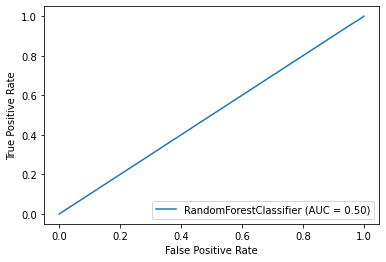

0.5

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
clf = RandomForestClassifier().fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
metrics.plot_roc_curve(clf, X_test, y_test)  # doctest: +SKIP
#plt.savefig("roc_rf")
plt.show()  
roc_auc_score(y_test, y_pred)

In [ ]:
dt = df_13.loc[df_13['label'] == 2]
print(dt.shape)

(518, 168)


In [ ]:
df_gen_added = pd.concat([df.iloc[:,2:],df2_gen])
df_gen_added = df_gen_added.drop(["Feature 167"], axis=1)
df_gen_added

,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12,Feature 13,Feature 14,Feature 15,Feature 16,Feature 17,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30,Feature 31,Feature 32,Feature 33,Feature 34,Feature 35,Feature 36,Feature 37,Feature 38,Feature 39,Feature 40,Feature 41,...,Feature 128,Feature 129,Feature 130,Feature 131,Feature 132,Feature 133,Feature 134,Feature 135,Feature 136,Feature 137,Feature 138,Feature 139,Feature 140,Feature 141,Feature 142,Feature 143,Feature 144,Feature 145,Feature 146,Feature 147,Feature 148,Feature 149,Feature 150,Feature 151,Feature 152,Feature 153,Feature 154,Feature 155,Feature 156,Feature 157,Feature 158,Feature 159,Feature 160,Feature 161,Feature 162,Feature 163,Feature 164,Feature 165,Feature 166,label
3,1.01152,-0.0811274,-1.20137,1.15367,0.333276,1.31266,-0.0615838,-0.163523,0.0413991,0.935886,-0.0986953,1.20304,0.988902,0.341693,-0.0132816,-0.0573921,0.0583287,-0.0329301,-0.0427091,0.0654548,0.324947,-0.139732,-0.148854,-0.0801048,-0.155638,1.31305,1.10696,-0.139734,-0.14885,-0.0801042,-0.155638,1.31313,1.107,-0.0246688,-0.0312724,-0.0230452,-0.0262147,0.00142781,0.00148264,-0.227215,...,-0.0931196,1.58769,1.58654,-0.10182,0.704558,0.448898,0.659662,0.311091,0.302198,-1.37396,-1.35539,-0.300941,-1.40458,0.0648458,-0.0352317,-0.168742,-0.442156,-0.41654,-0.418273,0.367605,0.392035,-0.968903,-1.94385,-1.05987,-1.679,0.185597,0.185492,-0.169472,-0.470592,-0.511871,-0.400422,0.517257,0.579382,0.0182794,0.277775,0.326394,1.29375,0.178136,0.179117,2
9,-0.147852,-0.184668,-1.20137,-0.12197,-0.0438745,-0.113002,-0.0615838,-0.137933,-0.144108,-0.049707,-0.140266,-0.0287413,-0.0353906,-0.0429553,-0.0132816,-0.00675372,-0.148916,-0.151494,-0.146513,0.887058,0.884557,-0.139721,-0.148905,-0.0801473,-0.155653,-0.010763,-0.0121075,-0.139723,-0.148901,-0.0801467,-0.155653,-0.0106686,-0.0120052,-0.0246688,-0.0312724,-0.0230452,-0.0262147,0.00142781,0.00148264,-0.227215,...,-0.127462,0.0031433,0.00242631,-0.11568,-0.190199,-0.177836,-0.201578,1.0642,1.06379,-1.37393,-1.35618,-0.301411,-1.40458,-0.975738,-0.975237,-0.168742,-0.445357,-0.409015,-0.427594,-1.01596,-1.01623,-0.968903,-1.94385,-1.05987,-1.679,0.185597,0.185492,-0.216814,-0.617907,-0.577099,-0.613614,0.241128,0.241406,0.0182794,-0.0874902,-0.131155,-0.0975236,-0.120613,-0.119792,2
10,-0.151357,-0.184668,-1.20137,-0.12197,-0.0438745,-0.113002,-0.0615838,-0.141519,-0.147643,-0.049707,-0.143847,-0.0287413,-0.0353906,-0.0429553,-0.0132816,-0.0384238,-0.150266,-0.150457,-0.150661,0.887058,0.884557,-0.139722,-0.148906,-0.0801473,-0.155654,-0.010763,-0.0121075,-0.139724,-0.148902,-0.0801467,-0.155654,-0.0106686,-0.0120052,-0.0246688,-0.0312724,-0.0230452,-0.0262147,0.00142781,0.00148264,-0.227215,...,-0.127462,0.0031433,0.00242631,-0.107516,-0.19082,-0.180486,-0.200607,1.0642,1.06379,-1.3739,-1.34883,-0.282308,-1.40047,-0.975738,-0.975237,-0.168742,-0.454961,-0.420758,-0.436915,-1.01596,-1.01623,-0.968903,-1.94385,-1.05987,-1.679,0.185597,0.185492,-0.216814,-0.587217,-0.539735,-0.582077,-0.979074,-0.978556,0.0182794,-0.0874902,-0.131155,-0.0975236,-0.120613,-0.119792,2
11,-0.172621,-0.162277,0.463609,-0.0469321,-0.0438745,-0.0291398,-0.0615838,-0.163512,-0.169227,-0.0487782,-0.165764,2.45922,2.41532,-0.0429553,-0.0132816,-0.0560914,-0.170872,-0.172695,-0.175836,0.887058,0.884557,-0.139732,-0.148912,-0.0801472,-0.155662,2.67939,2.66538,-0.139734,-0.148908,-0.0801467,-0.155662,2.67945,2.66531,-0.0246688,-0.0312724,-0.0230452,-0.0262147,0.00142781,0.00148264,-0.227215,...,-0.124412,-3.87219,-3.87185,-0.124473,-0.182729,-0.166347,-0.194807,1.0642,1.06379,-1.37387,-1.34915,-0.283202,-1.40064,1.342,1.34073,-0.159807,-0.451549,-0.419971,-0.430916,1.30197,1.30128,0.660117,0.146997,-0.45333,0.445895,1.48811,1.48793,-0.193143,-0.54425,-0.494897,-0.531617,1.46133,1.46137,0.0182794,-0.0874902,-0.131155,-

In [ ]:
df_gen_added

,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12,Feature 13,Feature 14,Feature 15,Feature 16,Feature 17,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30,Feature 31,Feature 32,Feature 33,Feature 34,Feature 35,Feature 36,Feature 37,Feature 38,Feature 39,Feature 40,Feature 41,...,Feature 128,Feature 129,Feature 130,Feature 131,Feature 132,Feature 133,Feature 134,Feature 135,Feature 136,Feature 137,Feature 138,Feature 139,Feature 140,Feature 141,Feature 142,Feature 143,Feature 144,Feature 145,Feature 146,Feature 147,Feature 148,Feature 149,Feature 150,Feature 151,Feature 152,Feature 153,Feature 154,Feature 155,Feature 156,Feature 157,Feature 158,Feature 159,Feature 160,Feature 161,Feature 162,Feature 163,Feature 164,Feature 165,Feature 166,label
8324,-0.139398,-0.208804,-0.429406,-0.057794,-0.037625,-0.149825,0.339806,-0.145036,-0.143056,0.021631,-0.143830,-0.236590,-0.276178,-0.039415,-0.009772,-0.185916,-0.133748,-0.128825,-0.153321,0.372607,0.360213,-0.086381,-0.118933,-0.086001,-0.111741,0.154813,0.162209,-0.085627,-0.117382,-0.083405,-0.112627,0.155364,0.162214,-0.034040,-0.064377,-0.159517,-0.048447,0.063200,-0.019086,0.151830,...,-0.095210,0.015114,0.011563,-0.192021,0.247701,0.365218,0.247688,0.266619,0.272725,-0.633050,-0.055305,1.387979,-0.321337,-1.160409,-1.160913,-0.041540,-0.913362,-1.048166,-0.848826,-2.020802,-1.987204,0.034641,-1.098601,-1.248550,-0.645357,-2.924027,-2.932541,0.443684,-0.103884,-0.195299,0.086929,-1.978102,-1.965327,-0.151125,0.009525,0.154619,0.030390,1.384095,1.350909,1.0
129306,-0.170590,0.152935,1.573595,0.103143,0.194326,0.138585,-0.061584,-0.163585,-0.167901,-0.040835,-0.165336,1.842799,1.925182,0.199981,-0.013282,-0.057390,-0.170339,-0.172452,-0.175860,-0.297028,-0.355136,-0.139732,-0.148912,-0.080147,-0.155662,2.012869,2.129880,-0.139734,-0.148907,-0.080146,-0.155662,2.012938,2.129845,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227215,...,-0.097977,-3.190548,-3.673034,-0.124694,-0.145670,-0.157667,-0.195564,-0.387053,-0.554607,0.498341,2.387344,2.708859,1.010229,0.770576,0.271922,-0.168898,-0.234231,-0.318981,-0.339699,-0.462370,-0.587442,0.660117,0.669709,-0.386974,0.749451,-0.669283,-0.669339,-0.216814,0.910488,0.217857,0.053172,-0.106375,0.090593,-0.098889,0.181652,0.216404,0.037850,-0.554164,-0.559543,2.0
191049,-0.172755,0.017885,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.163407,-0.169225,-0.049707,-0.165711,-0.028741,-0.035391,-0.042955,-0.013282,-0.057341,-0.170920,-0.172649,-0.175995,0.887058,0.884557,-0.139732,-0.148912,-0.080147,-0.155662,-0.010763,-0.012107,-0.139734,-0.148908,-0.080147,-0.155662,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227215,...,-0.127462,0.003143,0.002426,-0.124603,-0.200320,-0.188651,-0.215052,1.064205,1.063787,1.343737,1.035608,-0.295433,1.255086,-0.975738,-0.975237,-0.088015,-0.394413,-0.377315,-0.353861,-1.015963,-1.016230,0.660117,0.669709,0.153209,0.749451,-1.116918,-1.116948,-0.216814,-0.611769,-0.569626,-0.607306,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,2.0
10838,0.455528,-0.161248,0.015790,-0.243178,-0.039808,-0.203613,-0.217209,0.480968,0.467110,-0.043621,0.476602,-0.084877,-0.131628,-0.039243,-0.011372,-0.030014,0.435363,0.522615,0.527695,0.167796,0.156541,-0.092512,-0.120119,-0.081605,-0.118089,-0.042136,-0.058871,-0.094040,-0.119376,-0.081143,-0.119465,-0.044353,-0.059826,-0.019250,-0.021902,0.010559,-0.019650,-0.025056,0.056914,0.049411,...,-0.133300,-0.019449,-0.044986,0.029665,0.479233,0.646041,0.613865,0.144083,0.100317,0.108198,-0.798473,-2.244807,-0.369161,0.015555,0.057911,0.000315,0.743961,0.991555,0.792321,-0.389516,-0.386863,-0.814372,0.169812,1.162992,-0.387973,-0.786927,-0.797858,-0.605060,-0.772125,-0.630706,-0.859368,1.449680,1.469641,-0.014378,-0.146017,-0.246530,-0.218190

In [ ]:
from sklearn.utils import shuffle
df_gen_added = shuffle(df_gen_added)
df_gen_added

,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12,Feature 13,Feature 14,Feature 15,Feature 16,Feature 17,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30,Feature 31,Feature 32,Feature 33,Feature 34,Feature 35,Feature 36,Feature 37,Feature 38,Feature 39,Feature 40,Feature 41,...,Feature 128,Feature 129,Feature 130,Feature 131,Feature 132,Feature 133,Feature 134,Feature 135,Feature 136,Feature 137,Feature 138,Feature 139,Feature 140,Feature 141,Feature 142,Feature 143,Feature 144,Feature 145,Feature 146,Feature 147,Feature 148,Feature 149,Feature 150,Feature 151,Feature 152,Feature 153,Feature 154,Feature 155,Feature 156,Feature 157,Feature 158,Feature 159,Feature 160,Feature 161,Feature 162,Feature 163,Feature 164,Feature 165,Feature 166,label
8324,-0.139398,-0.208804,-0.429406,-0.0577941,-0.0376246,-0.149825,0.339806,-0.145036,-0.143056,0.0216314,-0.14383,-0.23659,-0.276178,-0.039415,-0.00977165,-0.185916,-0.133748,-0.128825,-0.153321,0.372607,0.360213,-0.0863805,-0.118933,-0.0860013,-0.111741,0.154813,0.162209,-0.0856273,-0.117382,-0.0834055,-0.112627,0.155364,0.162214,-0.0340398,-0.064377,-0.159517,-0.0484468,0.0631998,-0.0190863,0.15183,...,-0.0952102,0.0151143,0.0115629,-0.192021,0.247701,0.365218,0.247688,0.266619,0.272725,-0.63305,-0.055305,1.38798,-0.321337,-1.16041,-1.16091,-0.0415401,-0.913362,-1.04817,-0.848826,-2.0208,-1.9872,0.0346414,-1.0986,-1.24855,-0.645357,-2.92403,-2.93254,0.443684,-0.103884,-0.195299,0.0869286,-1.9781,-1.96533,-0.151125,0.00952455,0.154619,0.0303905,1.3841,1.35091,1
129306,-0.17059,0.152935,1.57359,0.103143,0.194326,0.138585,-0.0615838,-0.163585,-0.167901,-0.0408349,-0.165336,1.8428,1.92518,0.199981,-0.0132816,-0.0573902,-0.170339,-0.172452,-0.17586,-0.297028,-0.355136,-0.139732,-0.148912,-0.0801469,-0.155662,2.01287,2.12988,-0.139734,-0.148907,-0.0801464,-0.155662,2.01294,2.12985,-0.0246688,-0.0312724,-0.0230452,-0.0262147,0.00142781,0.00148264,-0.227215,...,-0.0979773,-3.19055,-3.67303,-0.124694,-0.14567,-0.157667,-0.195564,-0.387053,-0.554607,0.498341,2.38734,2.70886,1.01023,0.770577,0.271922,-0.168898,-0.234231,-0.318981,-0.339699,-0.46237,-0.587442,0.660117,0.669709,-0.386974,0.749451,-0.669283,-0.669339,-0.216814,0.910488,0.217857,0.0531724,-0.106375,0.0905928,-0.0988887,0.181652,0.216404,0.0378502,-0.554164,-0.559543,2
191049,-0.172755,0.0178854,1.0186,-0.12197,-0.0438745,-0.113002,-0.0615838,-0.163407,-0.169225,-0.049707,-0.165711,-0.0287413,-0.0353906,-0.0429553,-0.0132816,-0.0573408,-0.17092,-0.172649,-0.175995,0.887058,0.884557,-0.139732,-0.148912,-0.0801473,-0.155662,-0.010763,-0.0121075,-0.139734,-0.148908,-0.0801467,-0.155662,-0.0106686,-0.0120052,-0.0246688,-0.0312724,-0.0230452,-0.0262147,0.00142781,0.00148264,-0.227215,...,-0.127462,0.0031433,0.00242631,-0.124603,-0.20032,-0.188651,-0.215052,1.0642,1.06379,1.34374,1.03561,-0.295433,1.25509,-0.975738,-0.975237,-0.0880146,-0.394413,-0.377315,-0.353861,-1.01596,-1.01623,0.660117,0.669709,0.153209,0.749451,-1.11692,-1.11695,-0.216814,-0.611769,-0.569626,-0.607306,-0.979074,-0.978556,-0.0988887,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,2
10838,0.455528,-0.161248,0.0157896,-0.243177,-0.0398077,-0.203613,-0.217209,0.480968,0.46711,-0.0436207,0.476602,-0.0848766,-0.131628,-0.0392427,-0.0113719,-0.0300142,0.435363,0.522615,0.527695,0.167796,0.156541,-0.0925125,-0.120119,-0.0816046,-0.118089,-0.0421361,-0.0588713,-0.0940397,-0.119376,-0.0811428,-0.119465,-0.0443528,-0.0598256,-0.0192498,-0.021902,0.0105593,-0.0196497,-0.0250562,0.0569142,0.0494113,...,-0.1333,-0.0194492,-0.0449859,0.0296654,0.479233,0.646041,0.613865,0.144083,0.100317,0.108198,-0.798473,-2.24481,-0.369161,0.0155553,0.0579113,0.000314794,0.743961,0.991555,0.792321,-0.389516,-0.386863,-0.814372,0.169812,1.16299,-0.387973,-0.786927,-0.797858,-0.60506,-0.772125,-0.630706,-0.859368,1.44968,1.46964,-0.0143777,-

In [ ]:
df_gen_added = df_gen_added.astype('float32')

In [ ]:
X = df_gen_added.iloc[:,:-1]
y = df_gen_added.iloc[:,[-1]]

In [ ]:
y

,label
8324,1.0
129306,2.0
191049,2.0
10838,1.0
103365,2.0
...,...
57400,2.0
19089,1.0
130016,1.0
19463,2.0


In [ ]:
# Local Features and Aggregate Features
X_local = X.iloc[:,:94]
X_agg = X.iloc[:,94:]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3)

In [ ]:
clf = RandomForestClassifier().fit(X, y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


/bin/bash: matplotlib: command not found


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


[[ 6014  1306]
 [   73 12577]]
              precision    recall  f1-score   support

         1.0       0.99      0.82      0.90      7320
         2.0       0.91      0.99      0.95     12650

    accuracy                           0.93     19970
   macro avg       0.95      0.91      0.92     19970
weighted avg       0.94      0.93      0.93     19970



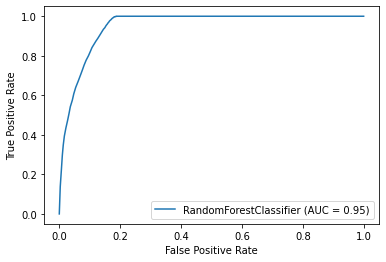

0.9079069742327048

In [ ]:
!matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
clf = RandomForestClassifier().fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
metrics.plot_roc_curve(clf, X_test, y_test)  # doctest: +SKIP
#plt.savefig("roc_rf")
plt.show()  
roc_auc_score(y_test, y_pred)

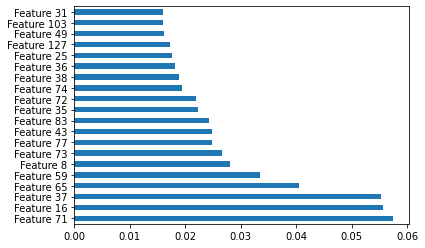

In [ ]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [ ]:
imp_features = feat_importances.nlargest(20)
imp_features

Feature 71     0.057412
Feature 16     0.055642
Feature 37     0.055245
Feature 65     0.040480
Feature 59     0.033460
Feature 8      0.028110
Feature 73     0.026661
Feature 77     0.024873
Feature 43     0.024866
Feature 83     0.024264
Feature 35     0.022376
Feature 72     0.022012
Feature 74     0.019342
Feature 38     0.018860
Feature 36     0.018149
Feature 25     0.017696
Feature 127    0.017198
Feature 49     0.016244
Feature 103    0.016057
Feature 31     0.015984
dtype: float64

In [ ]:
feature_select = ["Feature 71","Feature 16","Feature 37","Feature 65","Feature 59","Feature 8","Feature 73","Feature 77","Feature 43","Feature 83","Feature 35","Feature 72","Feature 74","Feature 38","Feature 36","Feature 25","Feature 127","Feature 49","Feature 103","Feature 31"]

In [ ]:
df_features = df_features.drop(["Feature 167"], axis=1)

In [ ]:
df_unlabelled=df_features.loc[df_features['label']=="unknown"]
df_unlabelled["label"].replace({"unknown": 3}, inplace=True)
df_unlabelled = df_unlabelled.drop(["label"],axis=1)
df_unlabelled = df_unlabelled.astype("float")

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4581: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
groups = df_unlabelled.groupby(["Feature 1"])

        Feature 0  Feature 1  Feature 2  ...  Feature 164  Feature 165  Feature 166
0       5530458.0        1.0  -0.171484  ...    -0.097524    -0.120613    -0.119792
1     232022460.0        1.0  -0.172107  ...    -0.183671    -0.120613    -0.119792
2     232438397.0        1.0   0.163054  ...     0.677799    -0.120613    -0.119792
4     230459870.0        1.0   0.961040  ...     1.149556    -0.696053    -0.695540
5     230333930.0        1.0  -0.171264  ...    -0.097524    -0.120613    -0.119792
...           ...        ...        ...  ...          ...          ...          ...
7873   67286352.0        1.0  -0.172089  ...    -0.097524    -0.120613    -0.119792
7874  230658152.0        1.0  -0.172879  ...    -0.140597    -1.760926    -1.760984
7875   54735200.0        1.0  -0.172980  ...    -0.054450     1.519700     1.521399
7877   33654709.0        1.0  -0.169357  ...    -0.097524    -0.120613    -0.119792
7878   39251209.0        1.0  -0.172070  ...    -0.097524    -0.120613    -0

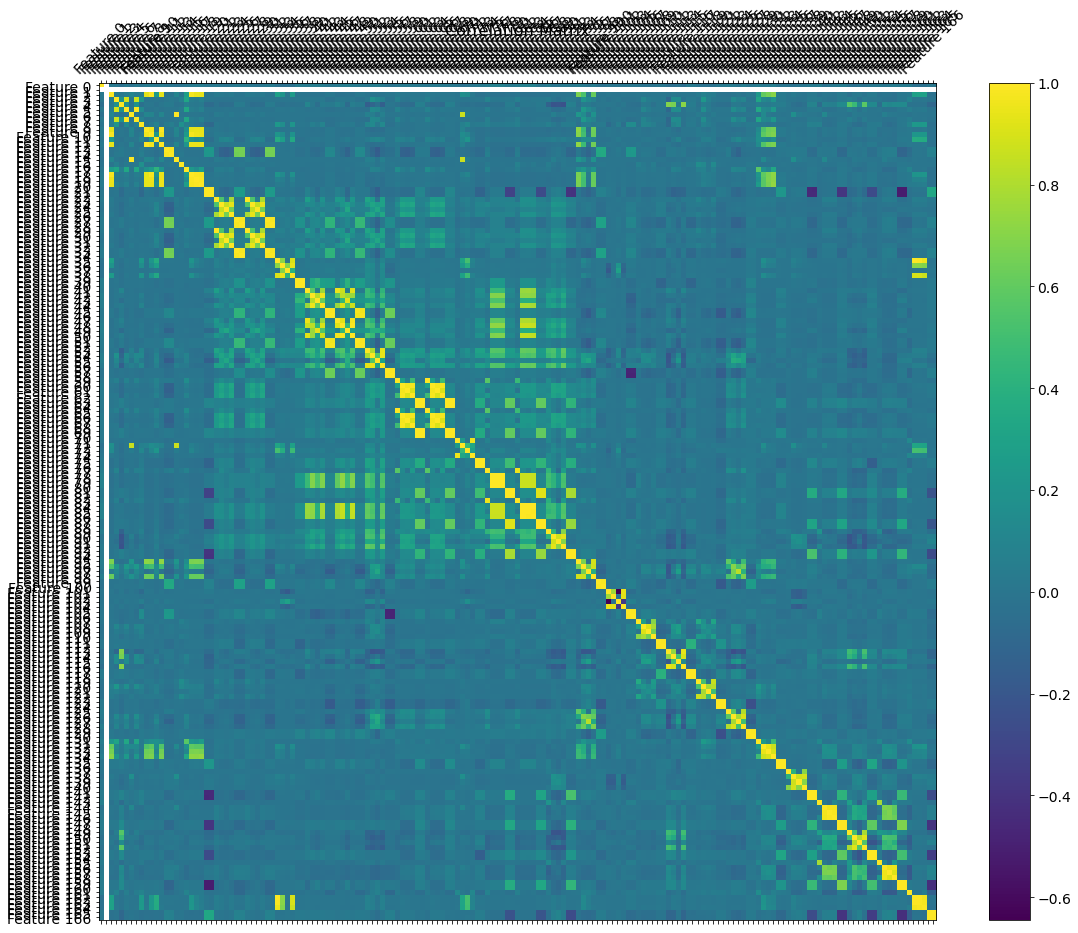

In [ ]:
print(groups.get_group(1))
scaled_features_df = groups.get_group(1)
corr = scaled_features_df.corr()
print(corr)
f = plt.figure(figsize=(19, 15))
plt.matshow(corr, fignum=f.number)
plt.xticks(range(scaled_features_df.shape[1]), scaled_features_df.columns, fontsize=14, rotation=45)
plt.yticks(range(scaled_features_df.shape[1]), scaled_features_df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.show()

In [ ]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.98)]

In [ ]:
print(to_drop)

['Feature 7', 'Feature 10', 'Feature 12', 'Feature 14', 'Feature 15', 'Feature 18', 'Feature 19', 'Feature 20', 'Feature 22', 'Feature 28', 'Feature 29', 'Feature 30', 'Feature 31', 'Feature 32', 'Feature 33', 'Feature 34', 'Feature 40', 'Feature 46', 'Feature 50', 'Feature 52', 'Feature 58', 'Feature 64', 'Feature 65', 'Feature 66', 'Feature 67', 'Feature 68', 'Feature 69', 'Feature 70', 'Feature 76', 'Feature 79', 'Feature 80', 'Feature 82', 'Feature 85', 'Feature 86', 'Feature 88', 'Feature 94', 'Feature 100', 'Feature 106', 'Feature 112', 'Feature 118', 'Feature 124', 'Feature 130', 'Feature 136', 'Feature 142', 'Feature 146', 'Feature 148', 'Feature 154', 'Feature 160', 'Feature 162', 'Feature 163', 'Feature 164', 'Feature 166']


In [ ]:
df_preprocessed = scaled_features_df.drop(scaled_features_df[to_drop], axis=1)
df_preprocessed

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 8,Feature 9,Feature 11,Feature 13,Feature 16,Feature 17,Feature 21,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 35,Feature 36,Feature 37,Feature 38,Feature 39,Feature 41,Feature 42,Feature 43,Feature 44,Feature 45,Feature 47,Feature 48,Feature 49,Feature 51,Feature 53,Feature 54,Feature 55,Feature 56,Feature 57,Feature 59,Feature 60,...,Feature 114,Feature 115,Feature 116,Feature 117,Feature 119,Feature 120,Feature 121,Feature 122,Feature 123,Feature 125,Feature 126,Feature 127,Feature 128,Feature 129,Feature 131,Feature 132,Feature 133,Feature 134,Feature 135,Feature 137,Feature 138,Feature 139,Feature 140,Feature 141,Feature 143,Feature 144,Feature 145,Feature 147,Feature 149,Feature 150,Feature 151,Feature 152,Feature 153,Feature 155,Feature 156,Feature 157,Feature 158,Feature 159,Feature 161,Feature 165
0,5530458.0,1.0,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.061584,-0.162112,-0.049707,-0.028741,-0.013282,-0.055327,0.887058,-0.139731,-0.148912,-0.080147,-0.155661,-0.010763,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,-0.227215,-0.239368,-0.075256,-0.234952,0.037468,-0.227203,-0.243236,-0.097895,0.036577,-0.413965,-0.488307,-0.232553,-0.467516,0.048767,-0.039151,-0.172895,...,-1.267340,-0.349933,-1.230441,-0.004358,-0.116425,-0.176617,-0.137323,-0.152464,-0.026060,-0.093145,-0.143707,-0.097719,-0.127462,0.003143,-0.121330,-0.110933,-0.075909,-0.111641,-1.159649,-1.373723,-1.353918,-0.295982,-1.403215,-0.975738,-0.168742,-0.263290,-0.186389,-1.015963,-0.968903,0.146997,1.366287,-0.464773,-1.116918,-0.216814,0.634272,0.947382,0.673103,-0.979074,0.018279,-0.120613
1,232022460.0,1.0,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.061584,-0.162749,-0.049707,-0.028741,-0.013282,-0.055298,0.887058,-0.139729,-0.148911,-0.080147,-0.155660,-0.010763,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,-0.227178,-0.239333,-0.075256,-0.234914,0.037468,-0.227164,-0.243198,-0.097895,0.036577,-0.268737,-0.367521,-0.232553,-0.328163,0.048767,-0.039141,-0.172871,...,-1.267340,-0.349933,-1.230441,-0.004358,-0.116425,-0.176617,-0.137323,-0.152464,-0.026060,-0.095559,-0.145126,-0.097719,-0.129496,0.003143,-0.122974,-0.041556,0.012549,-0.032244,-1.159649,-1.373902,-1.356210,-0.301548,-1.404577,-0.975738,-0.168742,-0.192468,-0.099790,-1.015963,-0.968903,-1.421138,-0.453330,-1.375441,-1.116918,-0.216814,0.407161,0.670883,0.439728,-0.979074,-0.098889,-0.120613
2,232438397.0,1.0,0.163054,1.963790,-0.646376,12.409294,-0.063725,12.414558,-0.163645,0.043598,1.059993,-0.013282,4.800240,-0.243300,-0.139732,-0.146895,-0.079667,-0.155554,0.773847,-0.024669,-0.031271,-0.023044,-0.026215,0.101008,-0.227215,-0.156772,0.089307,-0.212195,-2.772015,-0.227203,-0.221151,-0.066858,-2.165534,-0.414008,4.181192,4.346640,1.777963,-1.451545,4.628683,0.513804,...,0.787435,0.856163,-1.104530,0.715115,-0.116425,0.312047,0.064623,-0.101755,-0.247676,-0.095559,0.523326,0.019771,-0.119195,0.147881,0.759756,-0.041556,-0.188716,0.149949,-0.047722,-1.373723,-1.356131,-0.301754,-1.404445,0.183133,-0.163577,-0.456561,-0.424672,0.143001,-0.425896,-1.421138,-1.059868,-1.071885,0.185597,-0.216814,-0.617907,-0.577099,-0.613614,0.241128,1.072793,-0.120613
4,230459870.0,1.0,0.961040,-0.081127,-1.201369,1.303743,0.333276,-0.061584,-0.163577,0.816377,0.907577,-0.013282,-0.057392,-0.243639,-0.139732,-0.148855,-0.080110,-0.155641,1.001646,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,-0.227215,-0.239368,-0.075256,-0.234952,0.037468,-0.227203,-0.243236,-0.097895,0.036577,-0.414031,-0.488237,-0.232438,-0.467563,-0.347808,-0.039151,-0.172664,...,-1.267340,-0.349933,-1.230441,-0.004358,1.033067,1.289375,0.774169,1.677228,1.064237,-0.047268,-0.116742,-0.097719,-0.088827,0.003143,-0.101046,0.704558,0.382060,0.272503,-0.433005,-1.373962,-1.354445,-0.300062,-1.404412,-0.108018,-0.168742,-0.441465,-0.415693,-0.330396,-0.968903,-0.375715,-0.498323,-1.592267,0.137499,-0.169472,-0.4460

In [ ]:
temp1 = groups.get_group(1)
for i in range(2,43):
    temp1 = pd.concat([temp1, groups.get_group(i)])
temp1

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12,Feature 13,Feature 14,Feature 15,Feature 16,Feature 17,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30,Feature 31,Feature 32,Feature 33,Feature 34,Feature 35,Feature 36,Feature 37,Feature 38,Feature 39,...,Feature 127,Feature 128,Feature 129,Feature 130,Feature 131,Feature 132,Feature 133,Feature 134,Feature 135,Feature 136,Feature 137,Feature 138,Feature 139,Feature 140,Feature 141,Feature 142,Feature 143,Feature 144,Feature 145,Feature 146,Feature 147,Feature 148,Feature 149,Feature 150,Feature 151,Feature 152,Feature 153,Feature 154,Feature 155,Feature 156,Feature 157,Feature 158,Feature 159,Feature 160,Feature 161,Feature 162,Feature 163,Feature 164,Feature 165,Feature 166
0,5530458.0,1.0,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,-0.167948,-0.049707,-0.164417,-0.028741,-0.035391,-0.042955,-0.013282,-0.055327,-0.169757,-0.171477,-0.174490,0.887058,0.884557,-0.139731,-0.148912,-0.080147,-0.155661,-0.010763,-0.012107,-0.139733,-0.148907,-0.080147,-0.155661,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,...,-0.097719,-0.127462,0.003143,0.002426,-0.121330,-0.110933,-0.075909,-0.111641,-1.159649,-1.160129,-1.373723,-1.353918,-0.295982,-1.403215,-0.975738,-0.975237,-0.168742,-0.263290,-0.186389,-0.250875,-1.015963,-1.016230,-0.968903,0.146997,1.366287,-0.464773,-1.116918,-1.116948,-0.216814,0.634272,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,232022460.0,1.0,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,-0.168576,-0.049707,-0.165054,-0.028741,-0.035391,-0.042955,-0.013282,-0.055298,-0.170400,-0.172217,-0.175227,0.887058,0.884557,-0.139729,-0.148911,-0.080147,-0.155660,-0.010763,-0.012107,-0.139731,-0.148906,-0.080147,-0.155660,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,...,-0.097719,-0.129496,0.003143,0.002426,-0.122974,-0.041556,0.012549,-0.032244,-1.159649,-1.160129,-1.373902,-1.356210,-0.301548,-1.404577,-0.975738,-0.975237,-0.168742,-0.192468,-0.099790,-0.182133,-1.015963,-1.016230,-0.968903,-1.421138,-0.453330,-1.375441,-1.116918,-1.116948,-0.216814,0.407161,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
2,232438397.0,1.0,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,-0.115831,0.043598,-0.163905,1.059993,2.397457,-0.063200,-0.013282,4.800240,0.174329,-0.172908,0.619399,-0.243300,-0.243452,-0.139732,-0.146895,-0.079667,-0.155554,0.773847,0.378516,-0.139734,-0.146891,-0.079667,-0.155553,0.773932,0.378593,-0.024669,-0.031271,-0.023044,-0.026215,0.101008,...,0.019771,-0.119195,0.147881,0.956170,0.759756,-0.041556,-0.188716,0.149949,-0.047722,-0.048171,-1.373723,-1.356131,-0.301754,-1.404445,0.183133,0.182748,-0.163577,-0.456561,-0.424672,-0.436915,0.143001,0.142525,-0.425896,-1.421138,-1.059868,-1.071885,0.185597,0.185492,-0.216814,-0.617907,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
4,230459870.0,1.0,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,0.038305,0.816377,-0.108000,0.907577,0.517402,0.341693,-0.013282,-0.057392,0.060033,-0.010829,-0.048401,-0.243639,-0.534976,-0.139732,-0.148855,-0.080110,-0.155641,1.001646,0.591836,-0.139734,-0.148851,-0.080109,-0.155641,1.001728,0.591900,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,...,-0.097719,-0.088827,0.003143,0.002426,-0.101046,0.704558,0.382060,0.272503,-0.433005,-0.492387,-1.373962,-1.354445,-0.300062,-1.404412,-0.108018,-0.357362,-0.168742,-0.441465,-0.415693,-0.419836,-0.330396,-0.236199,-0.968903,-0.375715,-0.498323,-1.592267,0.137499,0.137396,-0.169472,-0.446040,-0.504702,-0.422589,-0.226790,-0.117629,0.018279,0.

In [ ]:
temp1 = temp1.reset_index()
temp1

,index,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12,Feature 13,Feature 14,Feature 15,Feature 16,Feature 17,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30,Feature 31,Feature 32,Feature 33,Feature 34,Feature 35,Feature 36,Feature 37,Feature 38,...,Feature 127,Feature 128,Feature 129,Feature 130,Feature 131,Feature 132,Feature 133,Feature 134,Feature 135,Feature 136,Feature 137,Feature 138,Feature 139,Feature 140,Feature 141,Feature 142,Feature 143,Feature 144,Feature 145,Feature 146,Feature 147,Feature 148,Feature 149,Feature 150,Feature 151,Feature 152,Feature 153,Feature 154,Feature 155,Feature 156,Feature 157,Feature 158,Feature 159,Feature 160,Feature 161,Feature 162,Feature 163,Feature 164,Feature 165,Feature 166
0,0,5530458.0,1.0,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,-0.167948,-0.049707,-0.164417,-0.028741,-0.035391,-0.042955,-0.013282,-0.055327,-0.169757,-0.171477,-0.174490,0.887058,0.884557,-0.139731,-0.148912,-0.080147,-0.155661,-0.010763,-0.012107,-0.139733,-0.148907,-0.080147,-0.155661,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,...,-0.097719,-0.127462,0.003143,0.002426,-0.121330,-0.110933,-0.075909,-0.111641,-1.159649,-1.160129,-1.373723,-1.353918,-0.295982,-1.403215,-0.975738,-0.975237,-0.168742,-0.263290,-0.186389,-0.250875,-1.015963,-1.016230,-0.968903,0.146997,1.366287,-0.464773,-1.116918,-1.116948,-0.216814,0.634272,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,1,232022460.0,1.0,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,-0.168576,-0.049707,-0.165054,-0.028741,-0.035391,-0.042955,-0.013282,-0.055298,-0.170400,-0.172217,-0.175227,0.887058,0.884557,-0.139729,-0.148911,-0.080147,-0.155660,-0.010763,-0.012107,-0.139731,-0.148906,-0.080147,-0.155660,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,...,-0.097719,-0.129496,0.003143,0.002426,-0.122974,-0.041556,0.012549,-0.032244,-1.159649,-1.160129,-1.373902,-1.356210,-0.301548,-1.404577,-0.975738,-0.975237,-0.168742,-0.192468,-0.099790,-0.182133,-1.015963,-1.016230,-0.968903,-1.421138,-0.453330,-1.375441,-1.116918,-1.116948,-0.216814,0.407161,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
2,2,232438397.0,1.0,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,-0.115831,0.043598,-0.163905,1.059993,2.397457,-0.063200,-0.013282,4.800240,0.174329,-0.172908,0.619399,-0.243300,-0.243452,-0.139732,-0.146895,-0.079667,-0.155554,0.773847,0.378516,-0.139734,-0.146891,-0.079667,-0.155553,0.773932,0.378593,-0.024669,-0.031271,-0.023044,-0.026215,...,0.019771,-0.119195,0.147881,0.956170,0.759756,-0.041556,-0.188716,0.149949,-0.047722,-0.048171,-1.373723,-1.356131,-0.301754,-1.404445,0.183133,0.182748,-0.163577,-0.456561,-0.424672,-0.436915,0.143001,0.142525,-0.425896,-1.421138,-1.059868,-1.071885,0.185597,0.185492,-0.216814,-0.617907,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
3,4,230459870.0,1.0,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,0.038305,0.816377,-0.108000,0.907577,0.517402,0.341693,-0.013282,-0.057392,0.060033,-0.010829,-0.048401,-0.243639,-0.534976,-0.139732,-0.148855,-0.080110,-0.155641,1.001646,0.591836,-0.139734,-0.148851,-0.080109,-0.155641,1.001728,0.591900,-0.024669,-0.031272,-0.023045,-0.026215,...,-0.097719,-0.088827,0.003143,0.002426,-0.101046,0.704558,0.382060,0.272503,-0.433005,-0.492387,-1.373962,-1.354445,-0.300062,-1.404412,-0.108018,-0.357362,-0.168742,-0.441465,-0.415693,-0.419836,-0.330396,-0.236199,-0.968903,-0.375715,-0.498323,-1.592267,0.137499,0.137396,-0.169472,-0.446040,-0.504702,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.69605

In [ ]:
from sklearn.cluster import KMeans
temp = groups.get_group(1)
temp = temp.iloc[:,2:]
kmeans = KMeans(n_clusters=2, random_state=0).fit(temp)
labels = kmeans.predict(temp)
all_labels = labels
for i in range(2,43):
    temp = groups.get_group(i)
    temp = temp.iloc[:,2:]
    kmeans = KMeans(n_clusters=2, random_state=0).fit(temp)
    labels = kmeans.predict(temp)
    all_labels = np.concatenate((all_labels, labels), axis=0)
print(all_labels)



[0 0 0 ... 1 1 1]


In [ ]:

unique, counts = np.unique(all_labels, return_counts=True)
print(np.asarray((unique, counts)).T)

[[    0 89568]
 [    1 44640]]


In [ ]:
all_labels[all_labels==0]=2

In [ ]:
print(np.isnan(all_labels).any())
all_labels_col= pd.Series(all_labels)
all_labels_col

False


0         2
1         2
2         2
3         2
4         2
         ..
134203    1
134204    1
134205    1
134206    1
134207    1
Length: 134208, dtype: int32

In [ ]:
all_labels_col.isna()


0         False
1         False
2         False
3         False
4         False
          ...  
134203    False
134204    False
134205    False
134206    False
134207    False
Length: 134208, dtype: bool

In [ ]:
temp1 = temp1.drop(["label"],axis=1)


In [ ]:
temp1["label"] = all_labels_col
temp1

,index,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12,Feature 13,Feature 14,Feature 15,Feature 16,Feature 17,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30,Feature 31,Feature 32,Feature 33,Feature 34,Feature 35,Feature 36,Feature 37,Feature 38,...,Feature 128,Feature 129,Feature 130,Feature 131,Feature 132,Feature 133,Feature 134,Feature 135,Feature 136,Feature 137,Feature 138,Feature 139,Feature 140,Feature 141,Feature 142,Feature 143,Feature 144,Feature 145,Feature 146,Feature 147,Feature 148,Feature 149,Feature 150,Feature 151,Feature 152,Feature 153,Feature 154,Feature 155,Feature 156,Feature 157,Feature 158,Feature 159,Feature 160,Feature 161,Feature 162,Feature 163,Feature 164,Feature 165,Feature 166,label
0,0,5530458.0,1.0,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,-0.167948,-0.049707,-0.164417,-0.028741,-0.035391,-0.042955,-0.013282,-0.055327,-0.169757,-0.171477,-0.174490,0.887058,0.884557,-0.139731,-0.148912,-0.080147,-0.155661,-0.010763,-0.012107,-0.139733,-0.148907,-0.080147,-0.155661,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,...,-0.127462,0.003143,0.002426,-0.121330,-0.110933,-0.075909,-0.111641,-1.159649,-1.160129,-1.373723,-1.353918,-0.295982,-1.403215,-0.975738,-0.975237,-0.168742,-0.263290,-0.186389,-0.250875,-1.015963,-1.016230,-0.968903,0.146997,1.366287,-0.464773,-1.116918,-1.116948,-0.216814,0.634272,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,2
1,1,232022460.0,1.0,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,-0.168576,-0.049707,-0.165054,-0.028741,-0.035391,-0.042955,-0.013282,-0.055298,-0.170400,-0.172217,-0.175227,0.887058,0.884557,-0.139729,-0.148911,-0.080147,-0.155660,-0.010763,-0.012107,-0.139731,-0.148906,-0.080147,-0.155660,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,...,-0.129496,0.003143,0.002426,-0.122974,-0.041556,0.012549,-0.032244,-1.159649,-1.160129,-1.373902,-1.356210,-0.301548,-1.404577,-0.975738,-0.975237,-0.168742,-0.192468,-0.099790,-0.182133,-1.015963,-1.016230,-0.968903,-1.421138,-0.453330,-1.375441,-1.116918,-1.116948,-0.216814,0.407161,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,2
2,2,232438397.0,1.0,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,-0.115831,0.043598,-0.163905,1.059993,2.397457,-0.063200,-0.013282,4.800240,0.174329,-0.172908,0.619399,-0.243300,-0.243452,-0.139732,-0.146895,-0.079667,-0.155554,0.773847,0.378516,-0.139734,-0.146891,-0.079667,-0.155553,0.773932,0.378593,-0.024669,-0.031271,-0.023044,-0.026215,...,-0.119195,0.147881,0.956170,0.759756,-0.041556,-0.188716,0.149949,-0.047722,-0.048171,-1.373723,-1.356131,-0.301754,-1.404445,0.183133,0.182748,-0.163577,-0.456561,-0.424672,-0.436915,0.143001,0.142525,-0.425896,-1.421138,-1.059868,-1.071885,0.185597,0.185492,-0.216814,-0.617907,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,2
3,4,230459870.0,1.0,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,0.038305,0.816377,-0.108000,0.907577,0.517402,0.341693,-0.013282,-0.057392,0.060033,-0.010829,-0.048401,-0.243639,-0.534976,-0.139732,-0.148855,-0.080110,-0.155641,1.001646,0.591836,-0.139734,-0.148851,-0.080109,-0.155641,1.001728,0.591900,-0.024669,-0.031272,-0.023045,-0.026215,...,-0.088827,0.003143,0.002426,-0.101046,0.704558,0.382060,0.272503,-0.433005,-0.492387,-1.373962,-1.354445,-0.300062,-1.404412,-0.108018,-0.357362,-0.168742,-0.441465,-0.415693,-0.419836,-0.330396,-0.236199,-0.968903,-0.375715,-0.498323,-1.592267,0.137499,0.137396,-0.169472,-0.446040,-0.504702,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540,2
4,5,230333930.0,1.0,-0.17

In [ ]:
X_test = temp1.iloc[:,3:-1]
y_test = temp1.iloc[:,-1]
X_test

,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12,Feature 13,Feature 14,Feature 15,Feature 16,Feature 17,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30,Feature 31,Feature 32,Feature 33,Feature 34,Feature 35,Feature 36,Feature 37,Feature 38,Feature 39,Feature 40,Feature 41,...,Feature 127,Feature 128,Feature 129,Feature 130,Feature 131,Feature 132,Feature 133,Feature 134,Feature 135,Feature 136,Feature 137,Feature 138,Feature 139,Feature 140,Feature 141,Feature 142,Feature 143,Feature 144,Feature 145,Feature 146,Feature 147,Feature 148,Feature 149,Feature 150,Feature 151,Feature 152,Feature 153,Feature 154,Feature 155,Feature 156,Feature 157,Feature 158,Feature 159,Feature 160,Feature 161,Feature 162,Feature 163,Feature 164,Feature 165,Feature 166
0,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,-0.167948,-0.049707,-0.164417,-0.028741,-0.035391,-0.042955,-0.013282,-0.055327,-0.169757,-0.171477,-0.174490,0.887058,0.884557,-0.139731,-0.148912,-0.080147,-0.155661,-0.010763,-0.012107,-0.139733,-0.148907,-0.080147,-0.155661,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227215,...,-0.097719,-0.127462,0.003143,0.002426,-0.121330,-0.110933,-0.075909,-0.111641,-1.159649,-1.160129,-1.373723,-1.353918,-0.295982,-1.403215,-0.975738,-0.975237,-0.168742,-0.263290,-0.186389,-0.250875,-1.015963,-1.016230,-0.968903,0.146997,1.366287,-0.464773,-1.116918,-1.116948,-0.216814,0.634272,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,-0.168576,-0.049707,-0.165054,-0.028741,-0.035391,-0.042955,-0.013282,-0.055298,-0.170400,-0.172217,-0.175227,0.887058,0.884557,-0.139729,-0.148911,-0.080147,-0.155660,-0.010763,-0.012107,-0.139731,-0.148906,-0.080147,-0.155660,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227178,...,-0.097719,-0.129496,0.003143,0.002426,-0.122974,-0.041556,0.012549,-0.032244,-1.159649,-1.160129,-1.373902,-1.356210,-0.301548,-1.404577,-0.975738,-0.975237,-0.168742,-0.192468,-0.099790,-0.182133,-1.015963,-1.016230,-0.968903,-1.421138,-0.453330,-1.375441,-1.116918,-1.116948,-0.216814,0.407161,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
2,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,-0.115831,0.043598,-0.163905,1.059993,2.397457,-0.063200,-0.013282,4.800240,0.174329,-0.172908,0.619399,-0.243300,-0.243452,-0.139732,-0.146895,-0.079667,-0.155554,0.773847,0.378516,-0.139734,-0.146891,-0.079667,-0.155553,0.773932,0.378593,-0.024669,-0.031271,-0.023044,-0.026215,0.101008,0.026315,-0.227215,...,0.019771,-0.119195,0.147881,0.956170,0.759756,-0.041556,-0.188716,0.149949,-0.047722,-0.048171,-1.373723,-1.356131,-0.301754,-1.404445,0.183133,0.182748,-0.163577,-0.456561,-0.424672,-0.436915,0.143001,0.142525,-0.425896,-1.421138,-1.059868,-1.071885,0.185597,0.185492,-0.216814,-0.617907,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
3,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,0.038305,0.816377,-0.108000,0.907577,0.517402,0.341693,-0.013282,-0.057392,0.060033,-0.010829,-0.048401,-0.243639,-0.534976,-0.139732,-0.148855,-0.080110,-0.155641,1.001646,0.591836,-0.139734,-0.148851,-0.080109,-0.155641,1.001728,0.591900,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227215,...,-0.097719,-0.088827,0.003143,0.002426,-0.101046,0.704558,0.382060,0.272503,-0.433005,-0.492387,-1.373962,-1.354445,-0.300062,-1.404412,-0.108018,-0.357362,-0.168742,-0.441465,-0.415693,-0.419836,-0.330396,-0.236199,-0.968903,-0.375715,-0.498323,-1.592267,0.137499,0.137396,-0.169472,-0.446040,-0.504702,-0.422589,-0.226790,-0.11

In [ ]:
y_test

0         2
1         2
2         2
3         2
4         2
         ..
134203    1
134204    1
134205    1
134206    1
134207    1
Name: label, Length: 134208, dtype: int32

[[ 2942 41698]
 [ 7502 82066]]
              precision    recall  f1-score   support

           1       0.28      0.07      0.11     44640
           2       0.66      0.92      0.77     89568

    accuracy                           0.63    134208
   macro avg       0.47      0.49      0.44    134208
weighted avg       0.54      0.63      0.55    134208



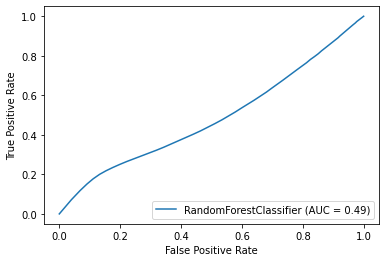

0.49107371296200264

In [ ]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
metrics.plot_roc_curve(clf, X_test, y_test)  # doctest: +SKIP
#plt.savefig("roc_rf")
plt.show()  
roc_auc_score(y_test, y_pred)

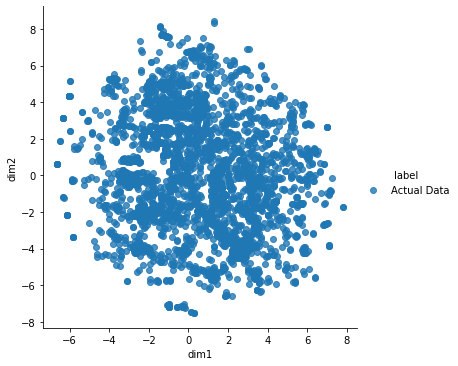

In [ ]:
actual = temp
n_patients, n_genes = actual.shape
label2 = ["Actual Data"]*n_patients
labels = pd.Series(label2).to_frame()
#dfeatures = pd.concat([gendata, actual], ignore_index=True,
#                     axis=0, sort=False)
X_embedded = TSNE(n_components=2, random_state=0, perplexity=1000).fit_transform(actual)
X_embedded = pd.DataFrame(X_embedded, columns=['dim1', 'dim2'])
X_embedded = pd.DataFrame(
    np.hstack([np.array(X_embedded), np.array(labels)]))
X_embedded.columns = ['dim1', 'dim2', 'label']
sns_fig = sns.lmplot(x='dim1', y='dim2', data=X_embedded, fit_reg=False, hue='label')
filename = "tsne_plot_"
plt.show()#(filename)